In this notebook, we analyse global effects such as lineage scores across conditions.

# Load Packages and Set Global Variables

<a id="imports"></a>

## Imports and Settings

In [4]:
import anndata
import cellrank as cr
import diffxpy.api as de
import gc
import numpy as np
import scanpy as sc
import scipy.stats
import scvelo as scv
import sys
import pandas as pd
import pickle
import seaborn as sb
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors

np.random.seed(seed=1)

In [5]:
import tftools as tft

In [6]:
sc.settings.verbosity = 3 # amount of output

root_dir = '.'

dir_in = root_dir + 'data/'
base_dir = root_dir + 'results/'
dir_gene_sets = root_dir + 'data/gene_sets/MSigDBlists/'
dir_cc_gene_set = root_dir + 'data/gene_sets/regev_lab_cell_cycle_genes_10X.txt'

# Make sure that these folders exist:
dir_out = base_dir + 'figures/afmos/'
dir_tables = base_dir + 'tables/afmos/'
dir_anndata = base_dir + 'anndata/afmos/'
dir_de = base_dir + 'de/afmos/'
dir_dbarchive = dir_in + 'reference_data/dbarchive/'

tf_ref_file = dir_gene_sets + 'c3.tft.v5.2.symbols.gmt'
bp_ref_file = dir_gene_sets + 'c5.bp.v5.2.symbols.gmt'
mf_ref_file = dir_gene_sets  + "c5.mf.v5.2.symbols.gmt"
hal_ref_file = dir_gene_sets + 'h.all.v5.2.symbols.gmt'

sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, scanpy=True)
sc.settings.figdir = dir_out
scv.settings.figdir = dir_out
print(sys.version)

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.8.1
sinfo       0.3.4
-----
2f7ece400a652629565c523b34ee61b04afa385c    NA
PIL                                         8.3.2
absl                                        NA
anyio                                       NA
appnope                                     0.1.2
astunparse                                  1.6.3
attr                                        21.2.0
babel                                       2.9.1
backcall                                    0.2.0
batchgl

In [7]:
constructs_dict = {
    "Ascl1": ["synAscl1_dsred-minus-gn", "synAscl1_dsred-plus-gn"],
    "Foxa2": ["synFoxA2_dsred-minus-gn", "synFoxA2_dsred-plus-gn"],
    "Myod1": ["synMyoD1_dsred-minus-gn", "synMyoD1_dsred-plus-gn"],
    "Oct4": ["synOct4-minus-gn", "synOct4-plus-gn"],
    "Sox2": ["synSox2-minus-gn", "synSox2-plus-gn"],
}
constructs = list(constructs_dict.keys())
constructs_color_dict = {
    "DsRed": ["DsRed-minus-gn", "DsRed-plus-gn"],
    "AcGFP1": ["AcGFP1-minus-gn", "AcGFP1-plus-gn"],
    "EBFP2": ["EBFP2-minus-gn", "EBFP2-plus-gn"],
}
constructs_color = list(constructs_color_dict.keys())
endogenous_genes = [
    "Ascl1",
    "Foxa2",
    "Myod1",
    "Pou5f1",
    "Sox2",
]

<a id="Global"></a>

## Global Variables

Set whether anndata objects are recomputed or loaded from cache.

In [8]:
bool_recomp = False

Set whether to produce plots, set to False for test runs.

In [9]:
bool_plot = True

Set colors for UMAP:

In [10]:
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

# Load data

In [11]:
adata_proc = sc.read(dir_anndata+'adata_proc.h5ad')

## Myod1

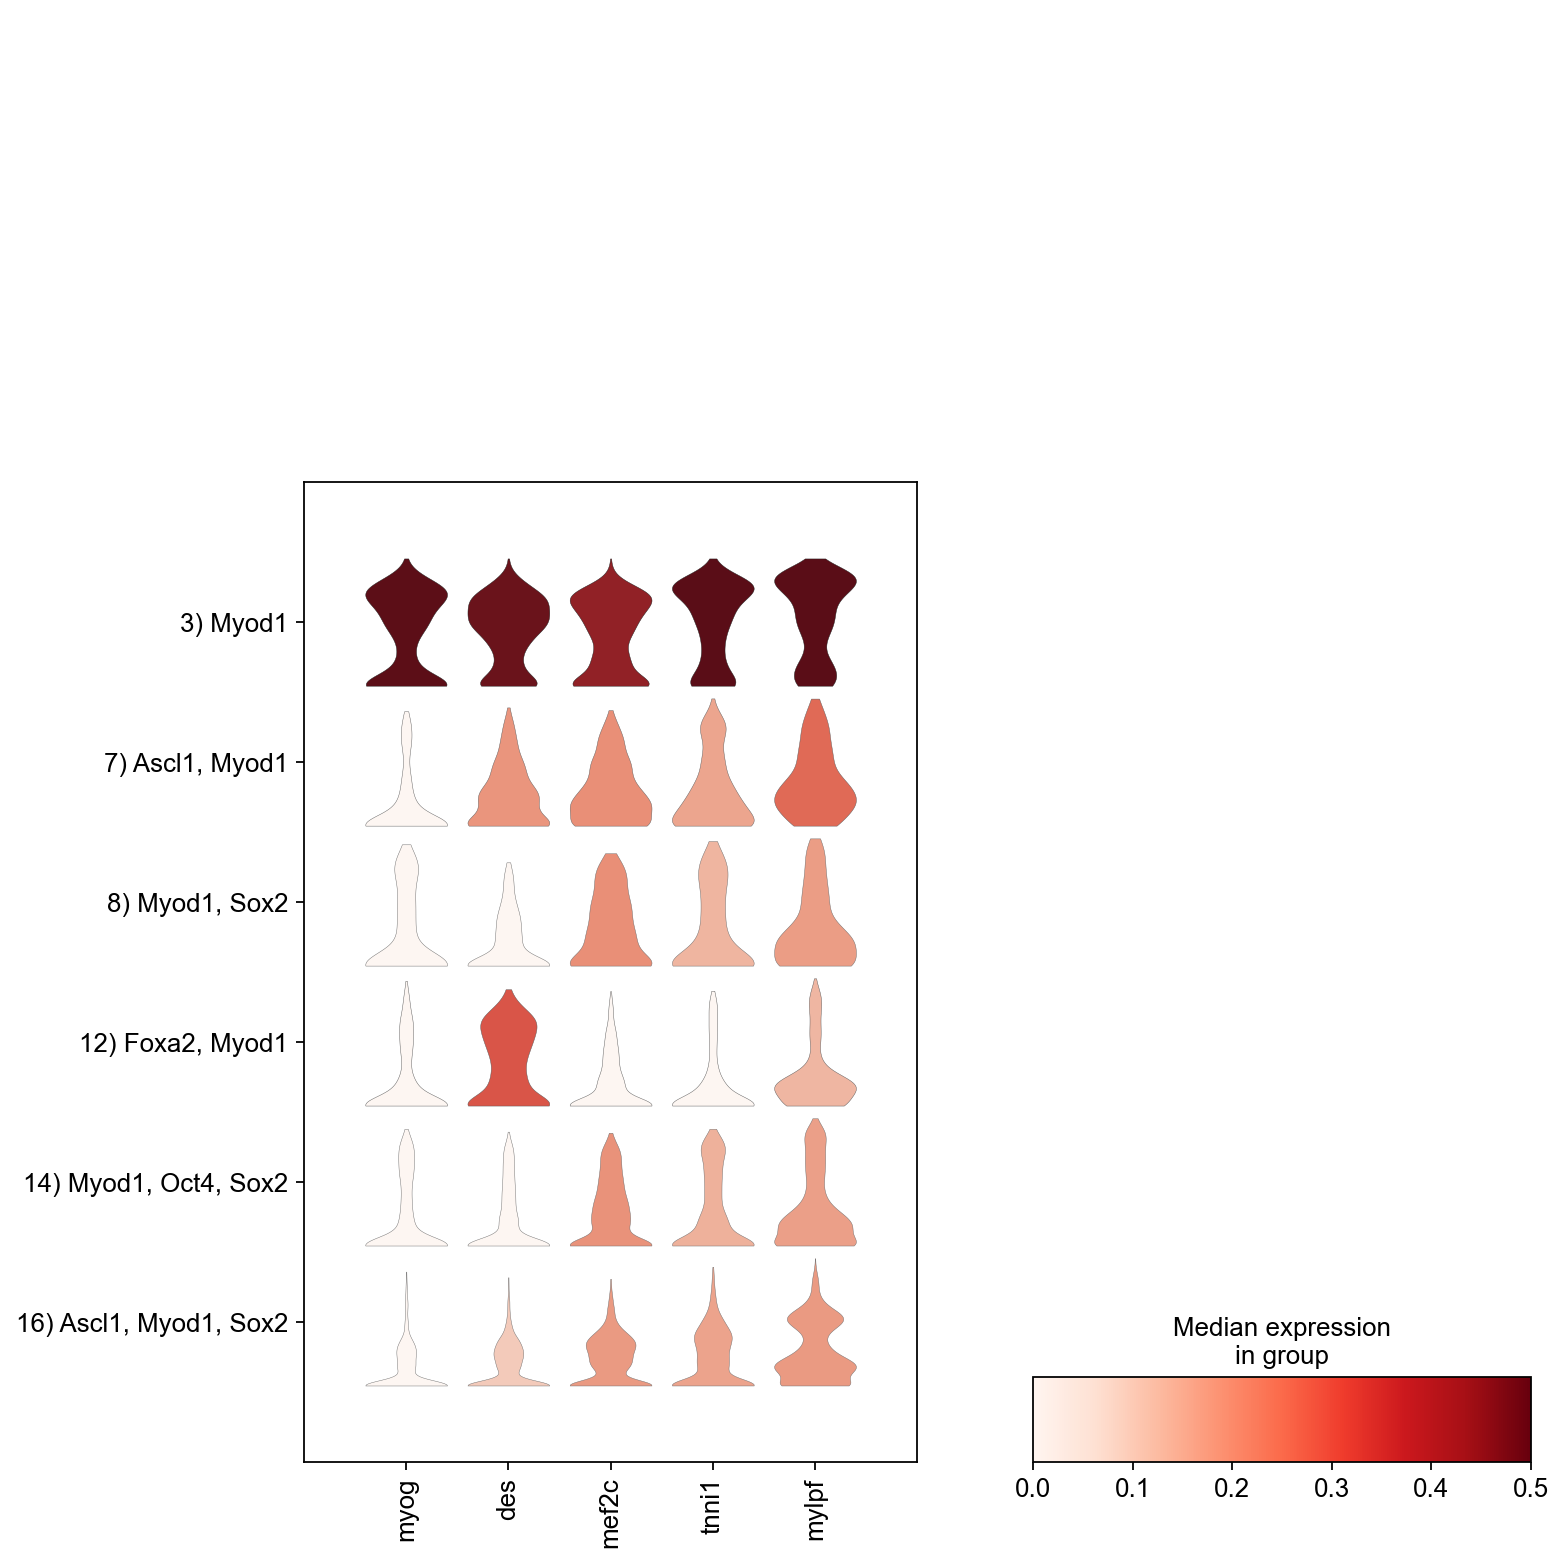

In [12]:
target_conds = [
    '3) Myod1', '7) Ascl1, Myod1', '12) Foxa2, Myod1', 
    '8) Myod1, Sox2', '16) Ascl1, Myod1, Sox2', '14) Myod1, Oct4, Sox2']
idx = [x in target_conds for x in adata_proc.obs["inferred_category_real"].values]

fig, ax = plt.subplots(1,1,figsize=(10, 10))
ax = sc.pl.stacked_violin(
    adata_proc[idx], 
    var_names =['myog', 'des', 'mef2c', 'tnni1', 'mylpf'], 
    groupby = 'inferred_category_real',
    use_raw = False,
    cmap = 'Reds',
    standard_scale = 'var',
    dendogram = True,
    swap_axes = False,
    vmin = 0,
    vmax = 0.5, 
    vcenter = 0.25,
    show=False, ax=ax,
)
plt.tight_layout()
plt.savefig(dir_out + "4d1.pdf")
plt.show()

## Ascl1

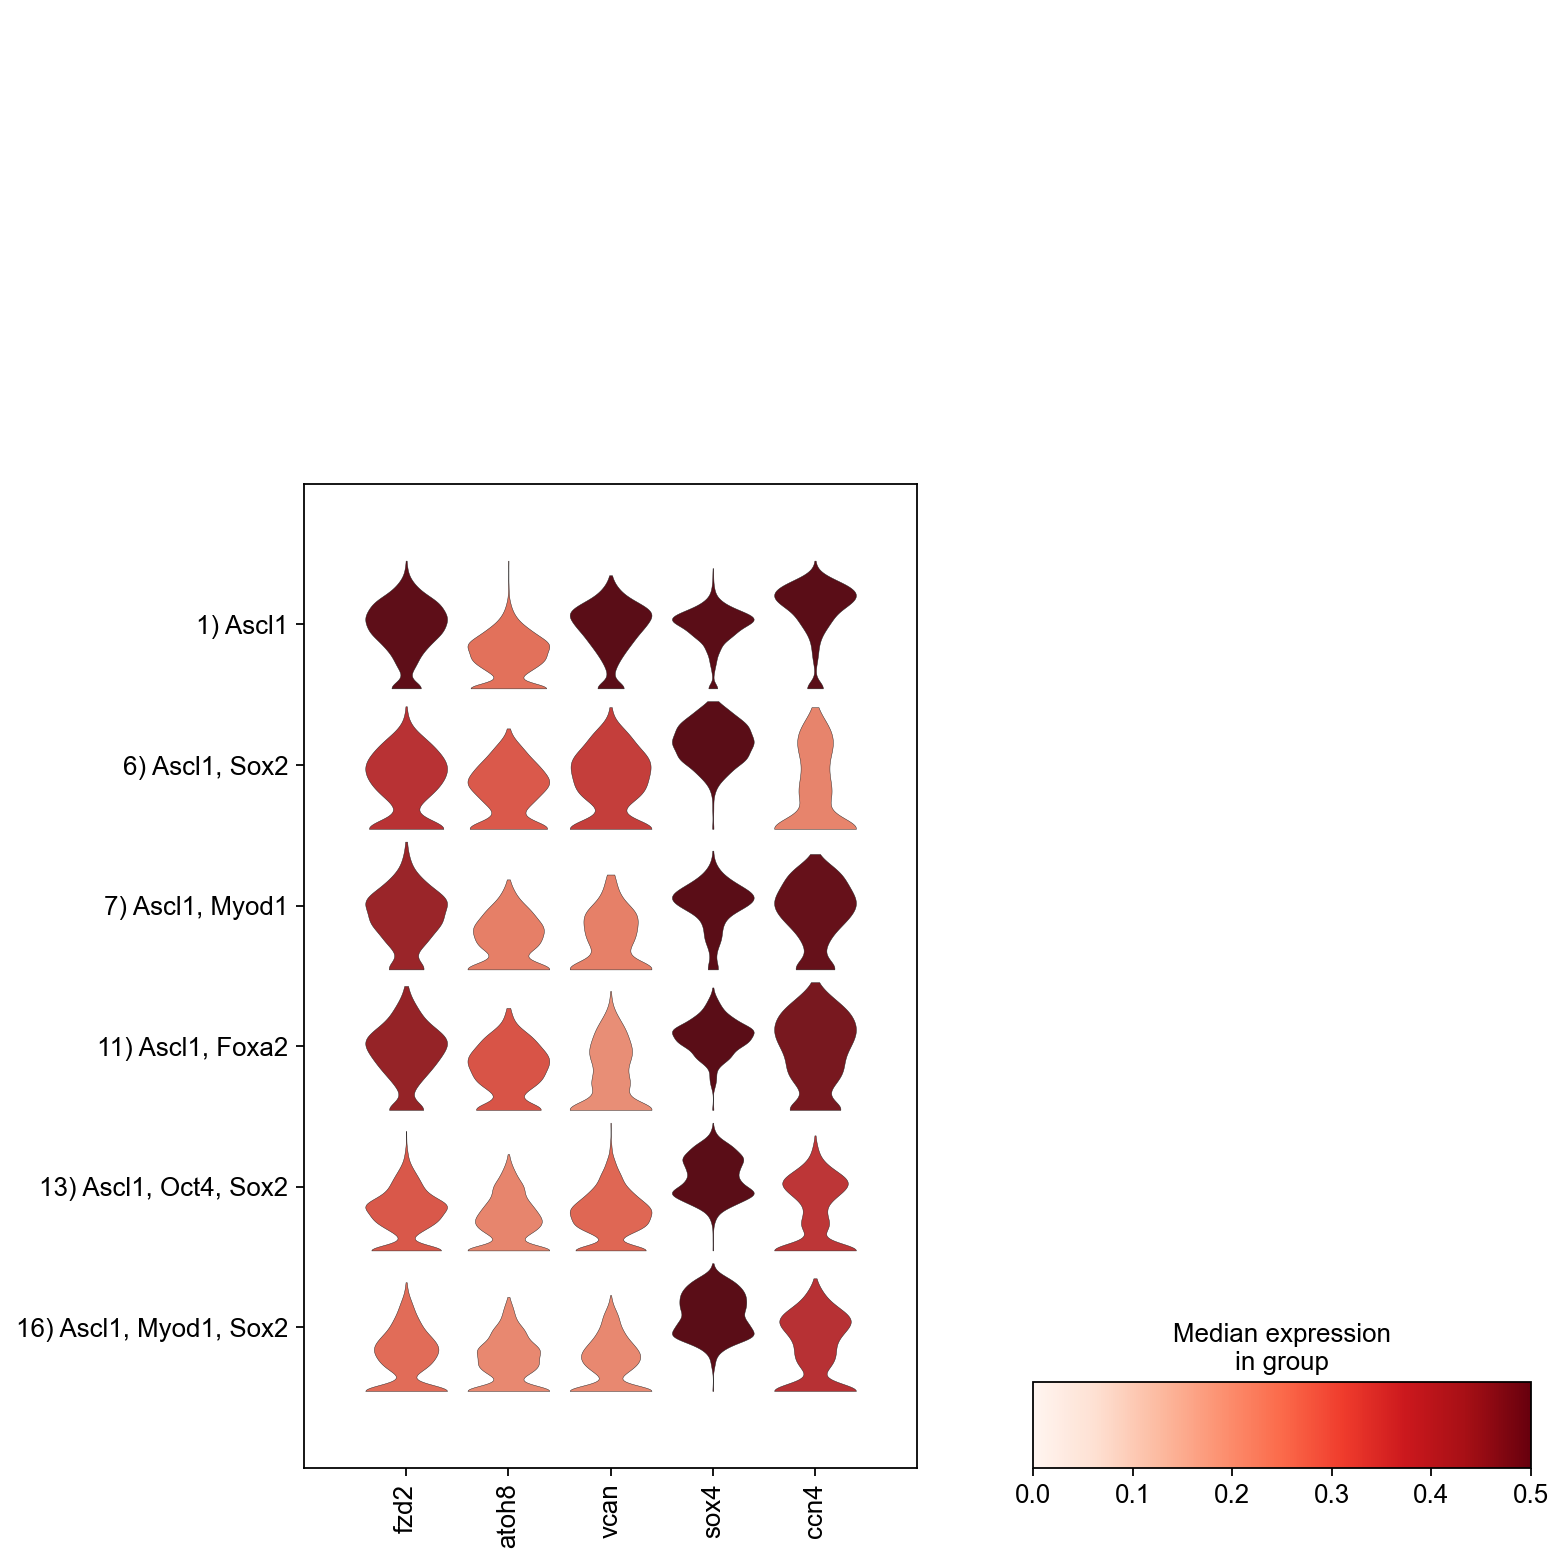

In [13]:
target_conds = [
    '1) Ascl1', '7) Ascl1, Myod1', '11) Ascl1, Foxa2', 
    '6) Ascl1, Sox2', '16) Ascl1, Myod1, Sox2', '13) Ascl1, Oct4, Sox2']
idx = [x in target_conds for x in adata_proc.obs["inferred_category_real"].values]

fig, ax = plt.subplots(1,1,figsize=(10, 10))
ax = sc.pl.stacked_violin(
    adata_proc[idx], 
    var_names =['fzd2', 'atoh8', 'vcan', 'sox4', 'ccn4'],
    groupby = 'inferred_category_real',
    use_raw = False,
    cmap = 'Reds',
    standard_scale = 'var',
    dendogram = True,
    swap_axes = False,
    vmin = 0,
    vmax = 0.5, 
    vcenter = 0.25,     
    show=False, ax=ax,
)
plt.tight_layout()
plt.savefig(dir_out + "4d2.pdf")
plt.show()

## Foxa2

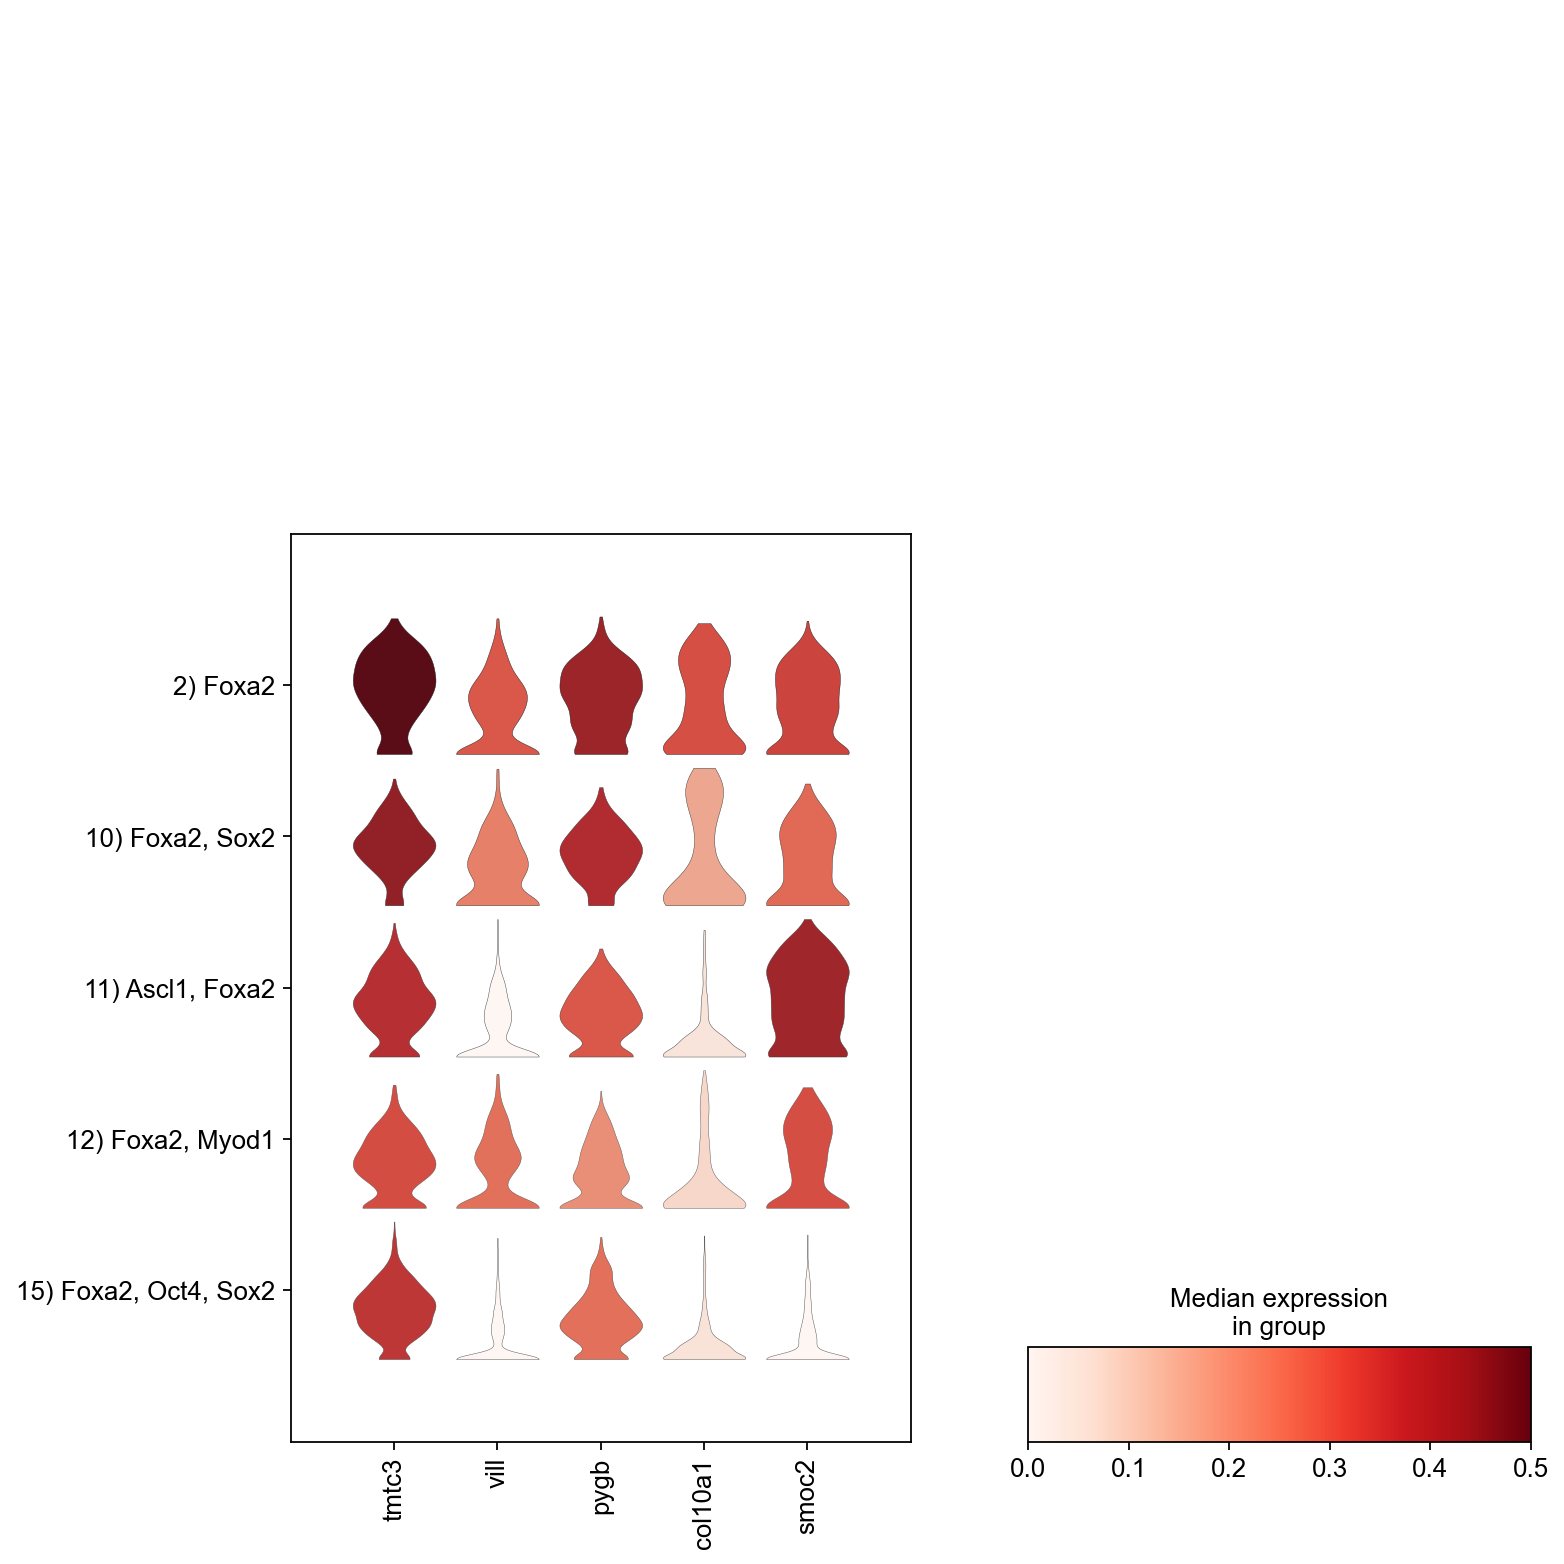

In [14]:
target_conds = [
    '2) Foxa2', '11) Ascl1, Foxa2', '12) Foxa2, Myod1', 
    '10) Foxa2, Sox2', '15) Foxa2, Oct4, Sox2']
idx = [x in target_conds for x in adata_proc.obs["inferred_category_real"].values]

fig, ax = plt.subplots(1,1,figsize=(10, 10))
ax = sc.pl.stacked_violin(
    adata_proc[idx], 
    var_names =['tmtc3', 'vill', 'pygb', 'col10a1', 'smoc2'], 
    groupby = 'inferred_category_real',
    use_raw = False,
    cmap = 'Reds',
    standard_scale = 'var',
    dendogram = True,
    swap_axes = False,
    vmin = 0,
    vmax = 0.5, 
    vcenter = 0.25,     
    show=False, ax=ax,
)
plt.tight_layout()
plt.savefig(dir_out + "4d3.pdf")
plt.show()

## Sox2

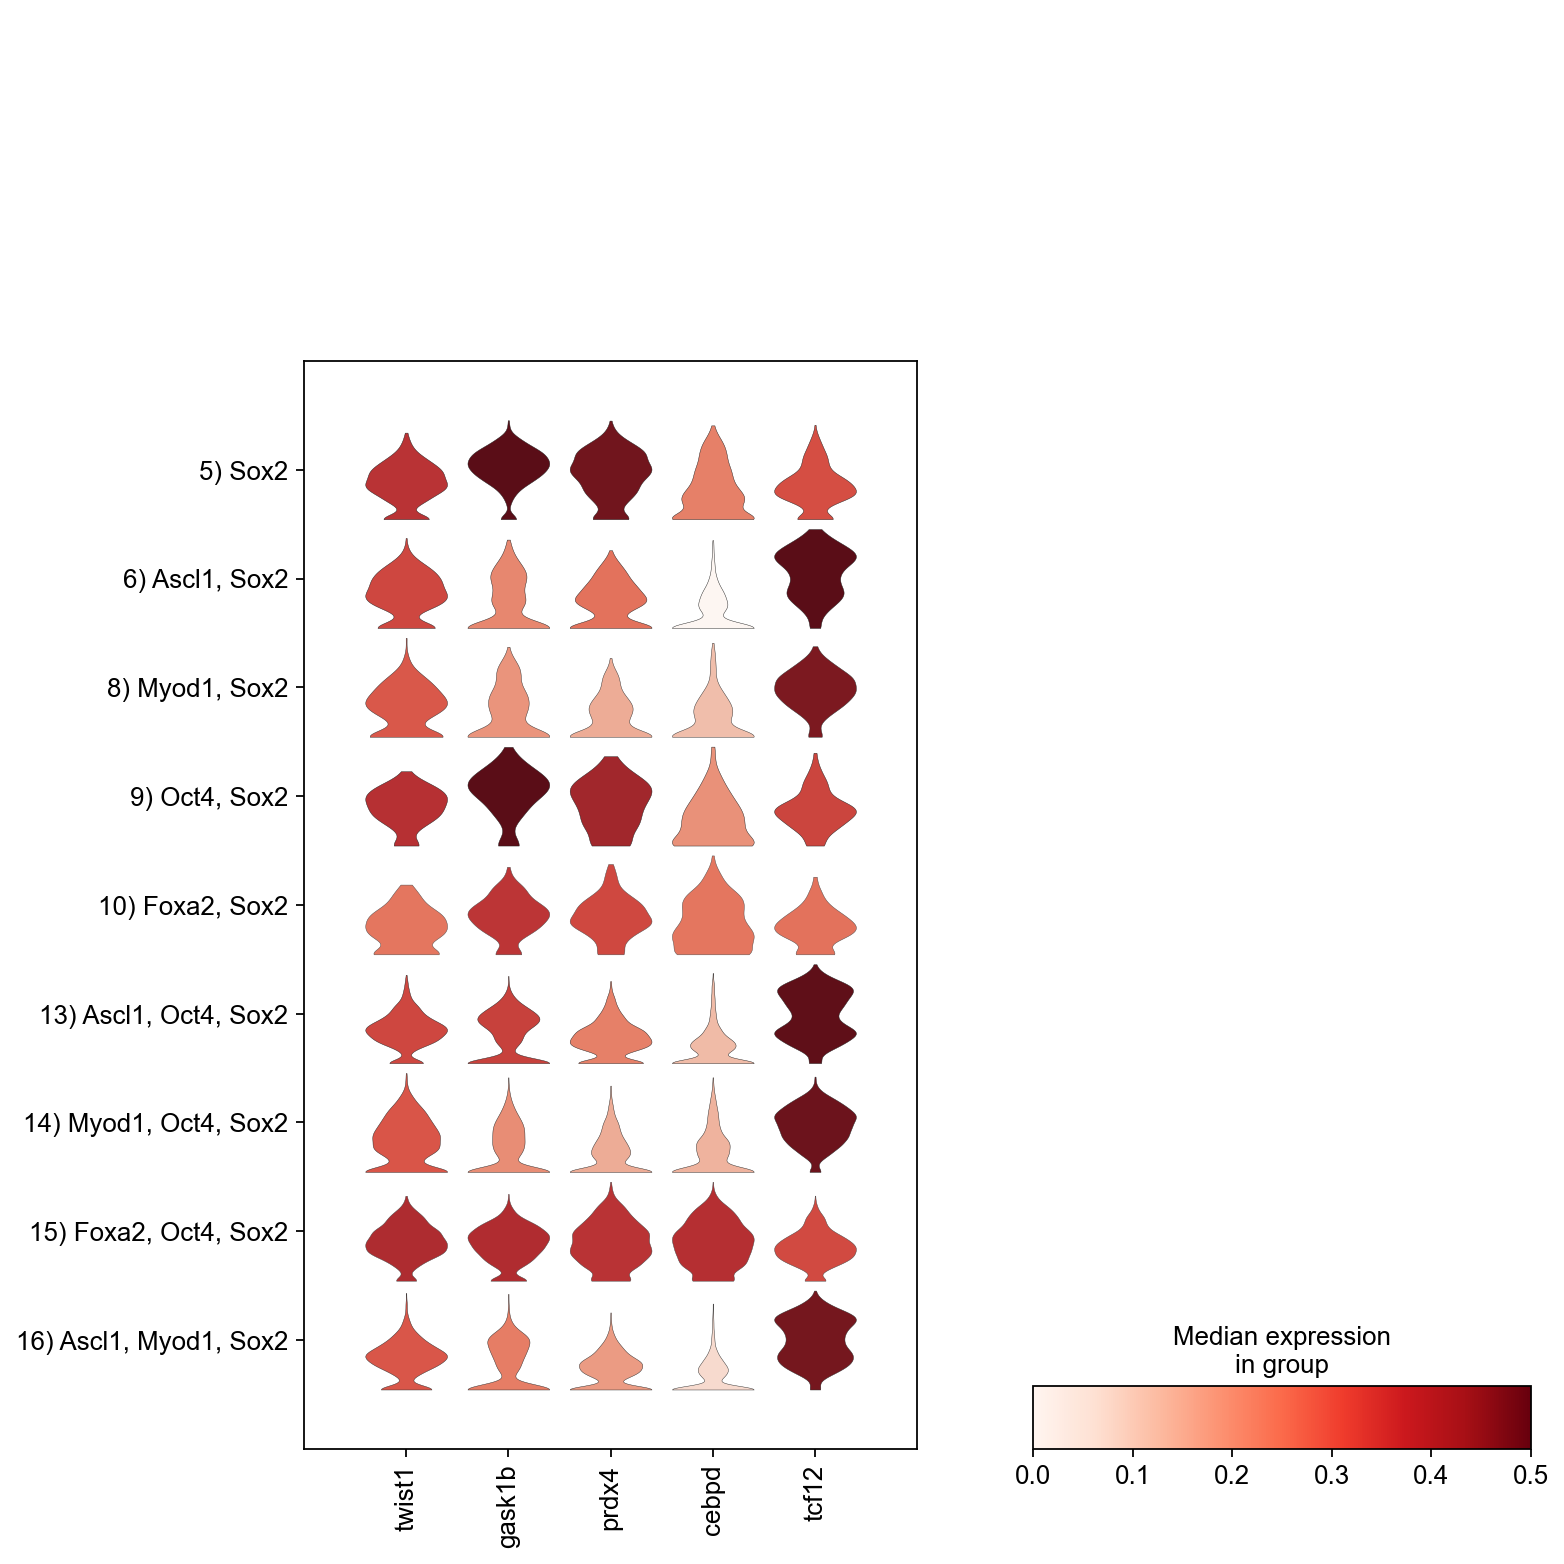

In [15]:
target_conds = [
    '5) Sox2', '6) Ascl1, Sox2', '8) Myod1, Sox2', '9) Oct4, Sox2', 
    '10) Foxa2, Sox2', '13) Ascl1, Oct4, Sox2', '14) Myod1, Oct4, Sox2',
    '15) Foxa2, Oct4, Sox2', '16) Ascl1, Myod1, Sox2']
idx = [x in target_conds for x in adata_proc.obs["inferred_category_real"].values]

fig, ax = plt.subplots(1,1,figsize=(10, 10))
ax = sc.pl.stacked_violin(
    adata_proc[idx], 
    var_names =['twist1', 'gask1b', 'prdx4', 'cebpd', 'tcf12'],
    groupby = 'inferred_category_real',
    use_raw = False,
    cmap = 'Reds',
    standard_scale = 'var',
    dendogram = True,
    swap_axes = False,
    vmin = 0,
    vmax = 0.5, 
    vcenter = 0.25,     
    show=False, ax=ax,
)
plt.tight_layout()
plt.savefig(dir_out + "4d4.pdf")
plt.show()

# Lineage heatmaps

In [163]:
def plot_heatmap(
    adata, 
    ref_list, 
    tf, 
    max_log, 
    save, 
    obs_restriction={},
    cmap="Reds", 
    suffix="_log"
):
    # Tailor the reference list of genes:
    print("not found: ")
    print([x for x in ref_list if x not in adata.var_names])
    ref_list = [x.lower() for x in ref_list]
    ref_list = [x for x in ref_list if x in adata.var_names]
    ref_list = [x for x in ref_list if x != tf.lower()]

    # Build anndata object for heatmap:
    plot_list = [tf.lower(), "assignment"] + ref_list
    adata_hm = anndata.AnnData(
        np.concatenate([
            np.expand_dims(np.minimum(np.array([max_log]), adata.obs[tf + "_log"].values), axis=1),
            np.expand_dims(pd.get_dummies([
                x[:3] == "17)"
                for x in adata.obs["inferred_category_real"].values
            ]).iloc[:, 0].values, axis=1)*max_log,
            np.minimum(
                np.log(adata.raw[:, ref_list].X.todense() / np.expand_dims(adata.obs["sf"].values, axis=1) + 1.),
                np.array([max_log]),
            ),
        ], axis=1),
        obs=adata.obs,
        var=pd.DataFrame({}, index=plot_list),
    )
    for k, v in obs_restriction.items():
        adata_hm = adata_hm[np.where([adata_hm.obs[k].values.astype(str) == v])[0], :].copy()
    sc.pl.heatmap(
        adata_hm, 
        plot_list, 
        groupby=tf + suffix,
        use_raw=False, 
        log=False,
        cmap=cmap,
        show=True,
        save=save+".pdf" if save is not None else None
    )
    sc.pl.heatmap(
        adata_hm, 
        plot_list, 
        groupby=tf + suffix,
        use_raw=False, 
        log=False,
        cmap="binary",
        show=True,
        save=save+"_cmap.pdf" if save is not None else None
    )
    return ref_list

In [141]:
adata_proc_Ascl1 = adata_proc[[x in ['1) Ascl1', '17) empty'] and y not in ['fibroblast_4']
                               for x, y in zip(adata_proc.obs["inferred_category_real"].values,
                                               adata_proc.obs["louvain_named"].values)], :].copy()
adata_proc_Myod1 = adata_proc[[x in ['3) Myod1', '17) empty'] and y not in ['fibroblast_4']
                               for x, y in zip(adata_proc.obs["inferred_category_real"].values,
                                               adata_proc.obs["louvain_named"].values)], :].copy()
adata_proc_Foxa2 = adata_proc[[x in ['2) Foxa2', '17) empty'] and y not in ['fibroblast_4']
                               for x, y in zip(adata_proc.obs["inferred_category_real"].values,
                                               adata_proc.obs["louvain_named"].values)], :].copy()
adata_proc_Sox2 = adata_proc[[x in ['5) Sox2', '17) empty'] and y not in ['fibroblast_4']
                               for x, y in zip(adata_proc.obs["inferred_category_real"].values,
                                               adata_proc.obs["louvain_named"].values)], :].copy()

## Ascl1

In [146]:
det = de.test.t_test(adata_proc_Ascl1, grouping="inferred_category_real", is_logged=True)
tab = det.summary(qval_thres=0.01, mean_thres=0.1).sort_values("log2fc")
ascl1_up_genes = tab["gene"].values[:40]
ascl1_down_genes = tab["gene"].values[-40:]

not found: 
[]
['ascl1', 'assignment', 'acta2', 'itga11', 'oaf', 'gask1b', 'anxa1', 'chd3', 'ckb', 'zdhhc2', 'anxa3', 'tagln', 'f3', 'fgf7', 'tnc', 'ccl7', 'galnt18', 'hbegf', 'fxyd5', 'igfbp7', 'timp1', 'tinagl1', 'ptgs2', 's100a6', 'gsto1', 'cd248', 'akap12', 'cd44', 'nupr1', 'grem1', 'hmga2', 'tm4sf1', 'ccl2', 'cnn1', 'fst', 'ccn2', 'cav1', '2200002d01rik', 'serpine1', 'ltbp2', 'fbln2', 'crlf1']


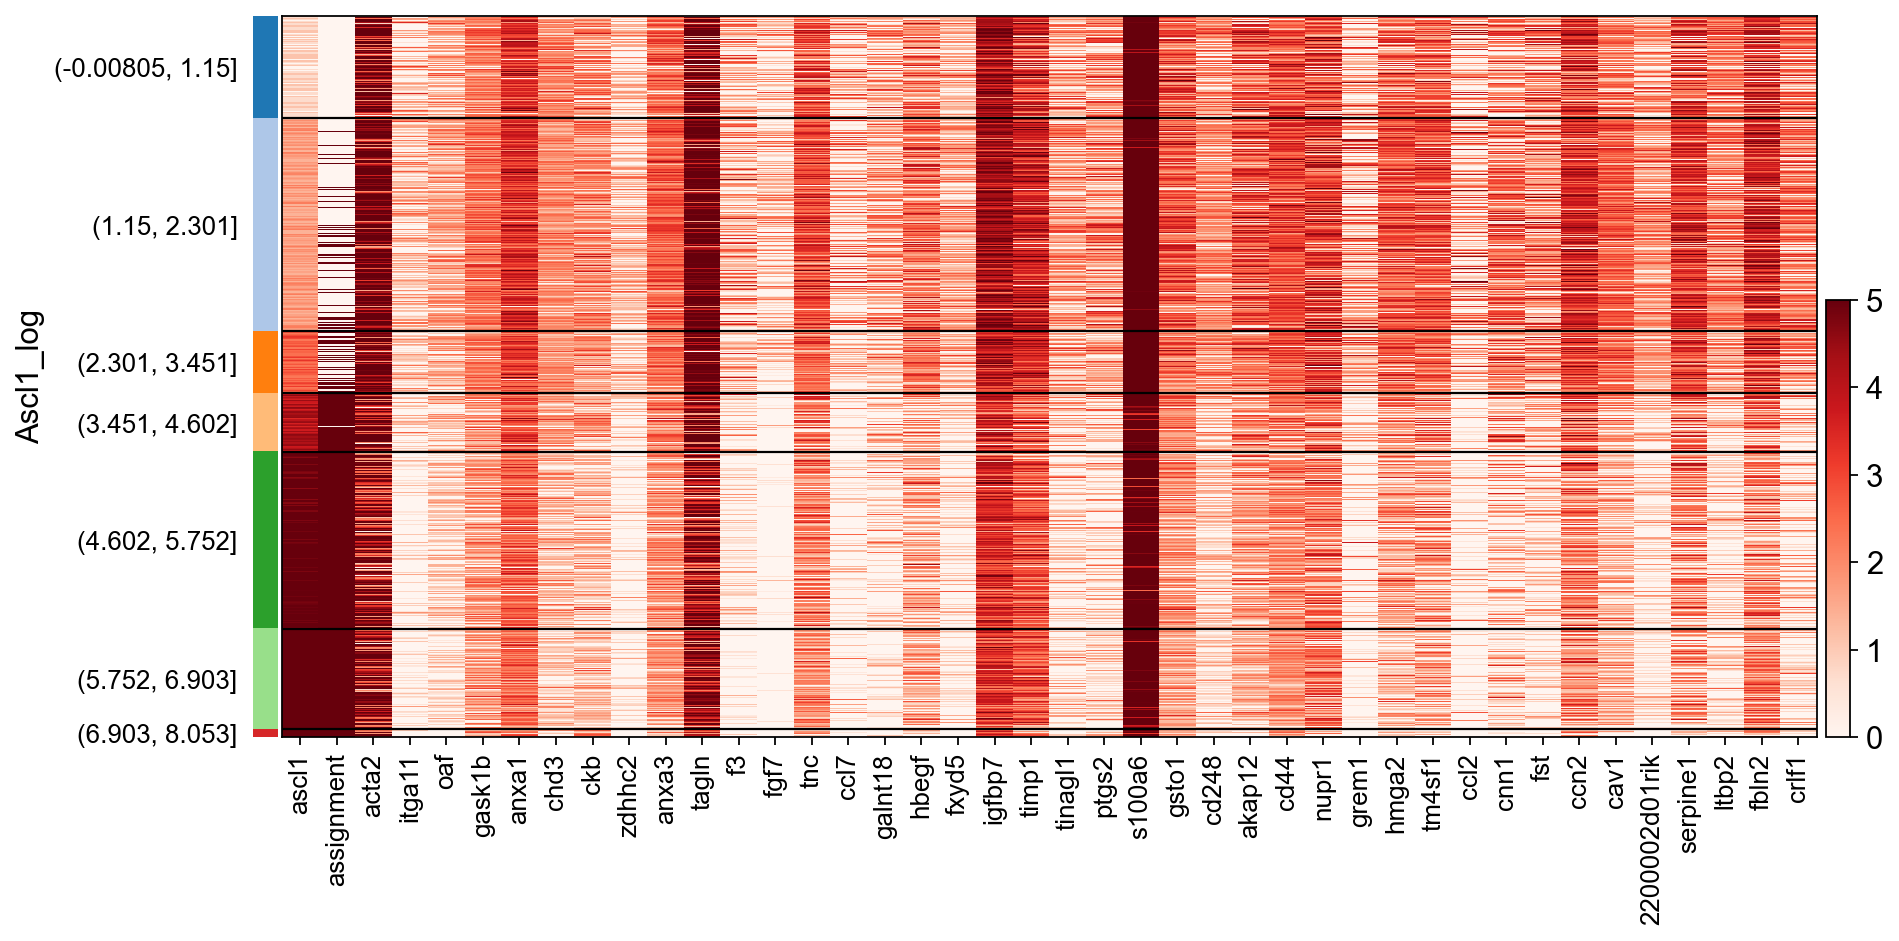

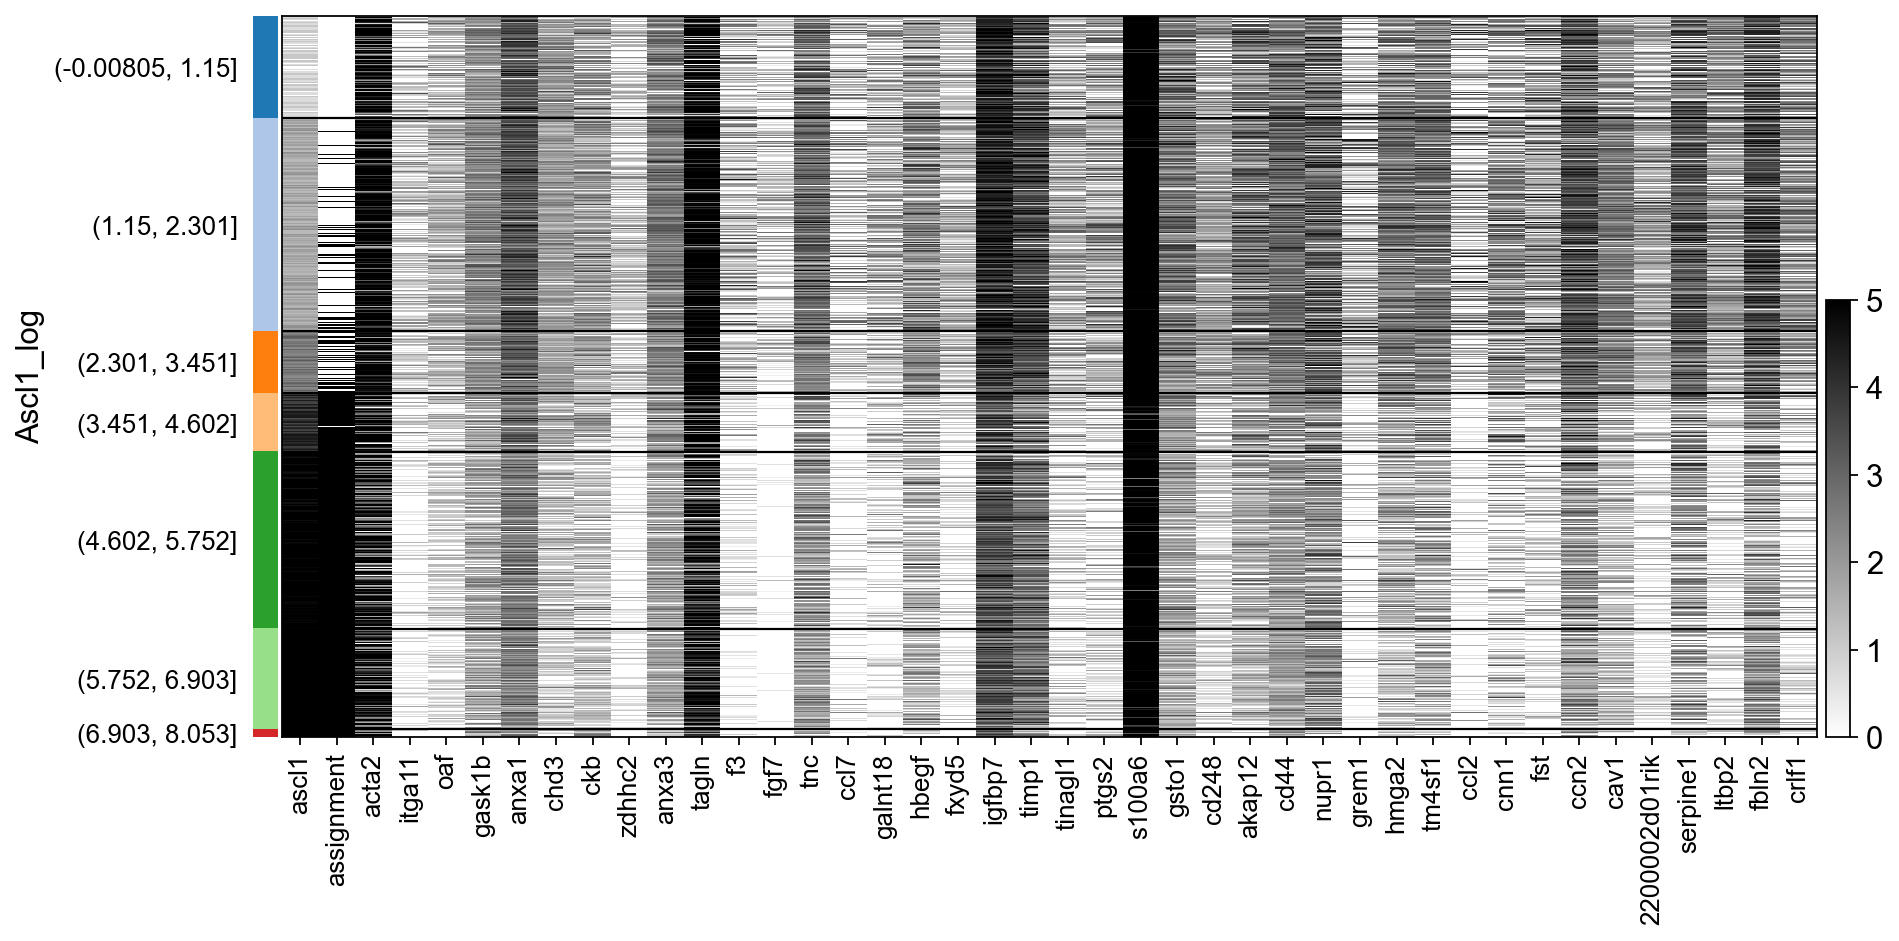

not found: 
[]
['ascl1', 'assignment', 'peg3', 'col18a1', 'spp1', 'igfbp5', 'hes6', 'lsp1', 'id2', 'id1', 'fbn2', 'r3hdml', 'vcan', 'lrrc17', 'fabp5', 'lpar1', 'errfi1', 'tenm4', 'gas1', 'enc1', 'igfbp3', 'ankrd1', 'fzd2', 'tmem119', 'tgfbr2', 'col14a1', 'ass1', 'dner', 'crabp1', 'nav1', 'adamts4', 'ucp2', 'cd200', 'nbl1', 'lama2', 'fabp7', 'sox4', 'cdon', 'ddr1', 'tmem176b', 'emilin1', 'adamts2']


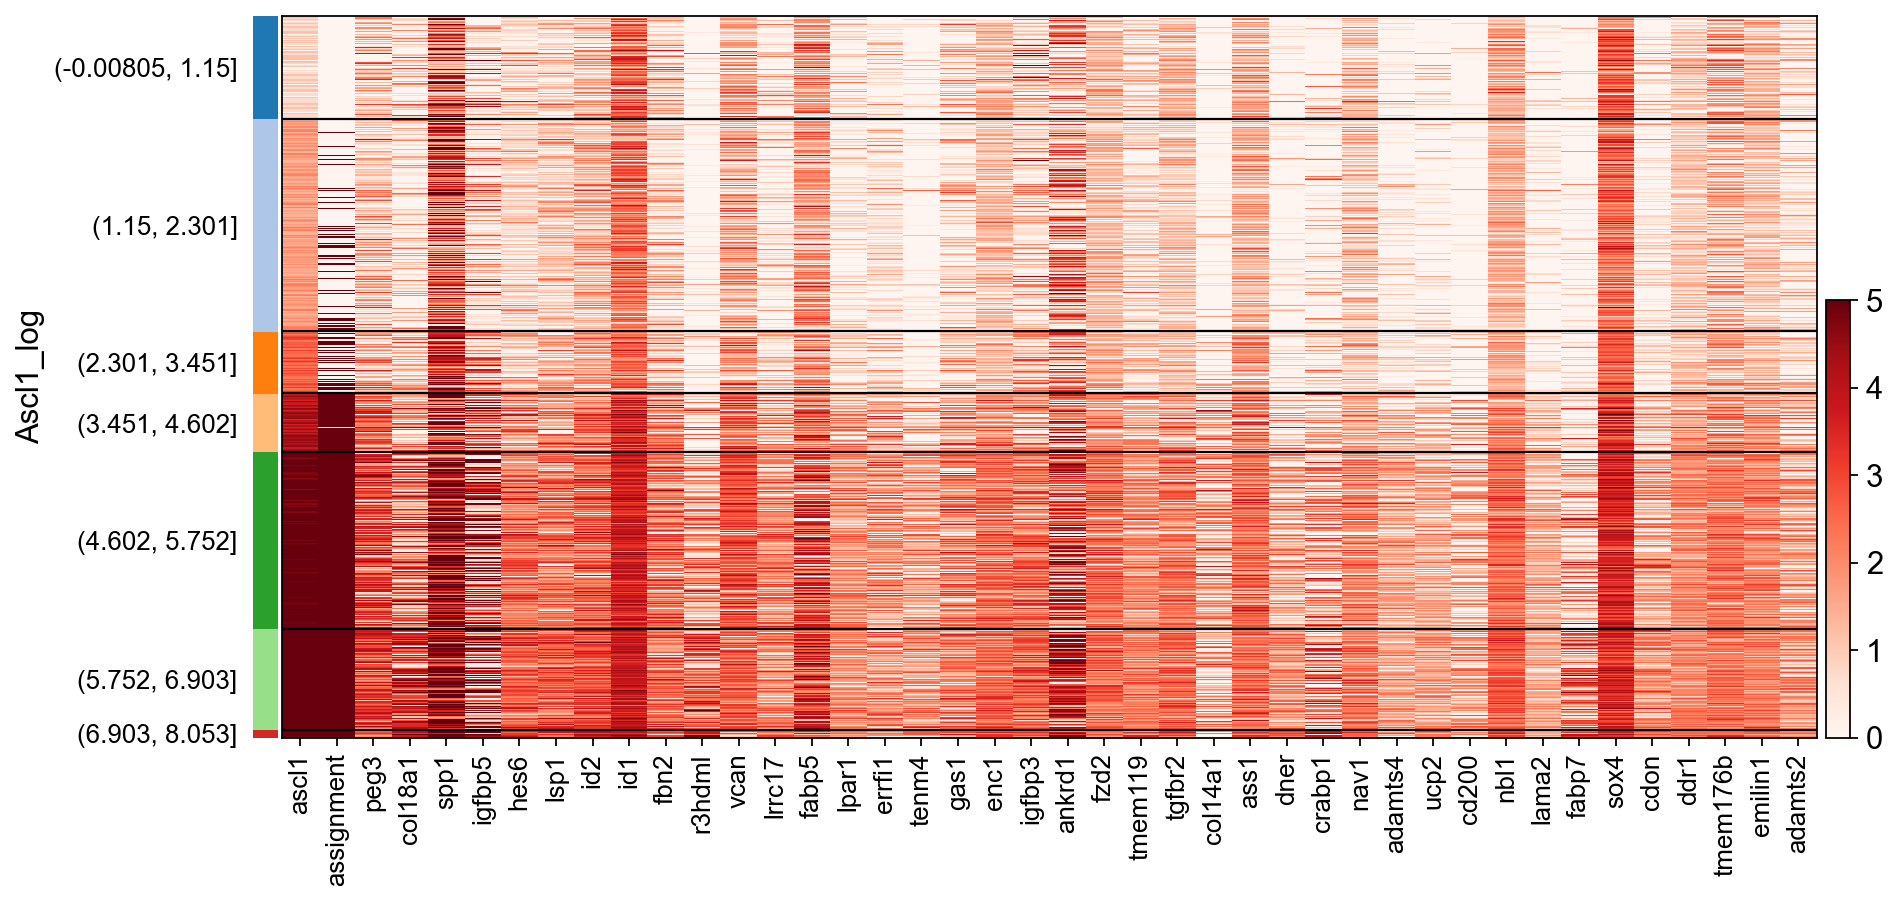

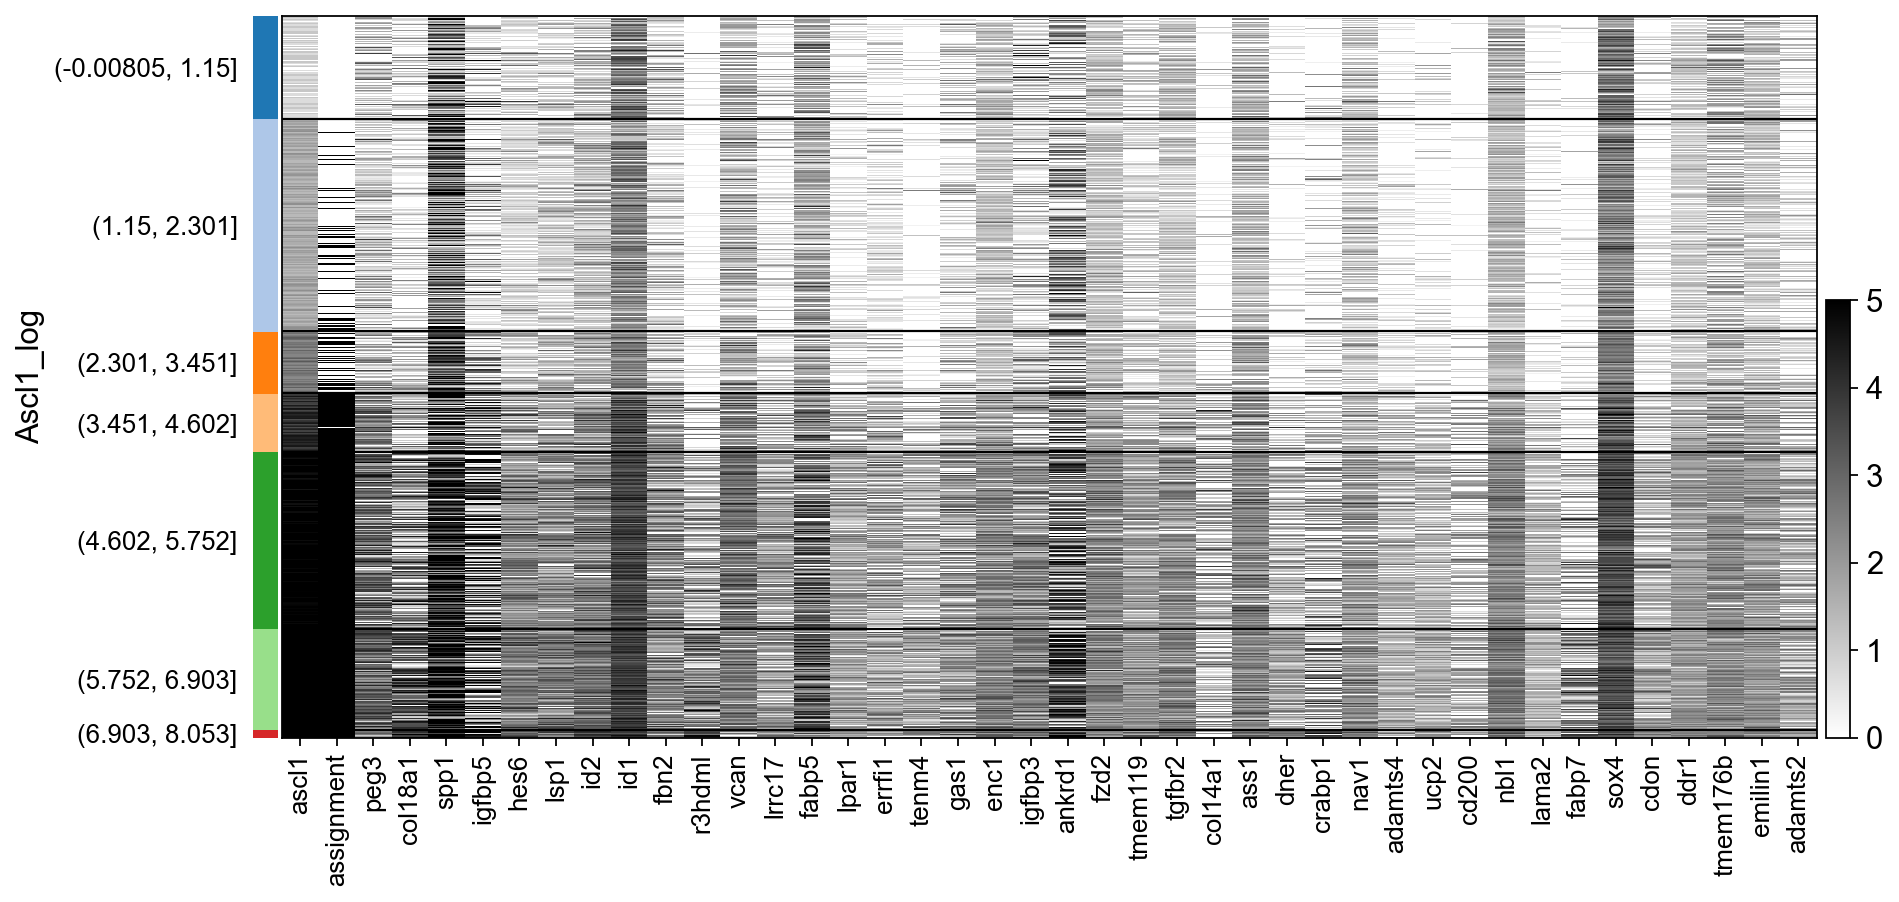

In [161]:
_ = plot_heatmap(
    adata=adata_proc_Ascl1, 
    ref_list=ascl1_down_genes, 
    tf="Ascl1",
    suffix="_log", 
    max_log=5,
    save=None
)
_ = plot_heatmap(
    adata=adata_proc_Ascl1, 
    ref_list=ascl1_up_genes, 
    tf="Ascl1",
    suffix="_log", 
    max_log=5,
    save="SI4a"
)

## Myod1

In [179]:
det = de.test.t_test(adata_proc_Myod1, grouping="inferred_category_real", is_logged=True)
tab = det.summary(qval_thres=0.01, mean_thres=0.1).sort_values("log2fc")
myod1_down_genes = tab["gene"].values[:40]
myod1_up_genes = tab["gene"].values[-40:]

not found: 
[]


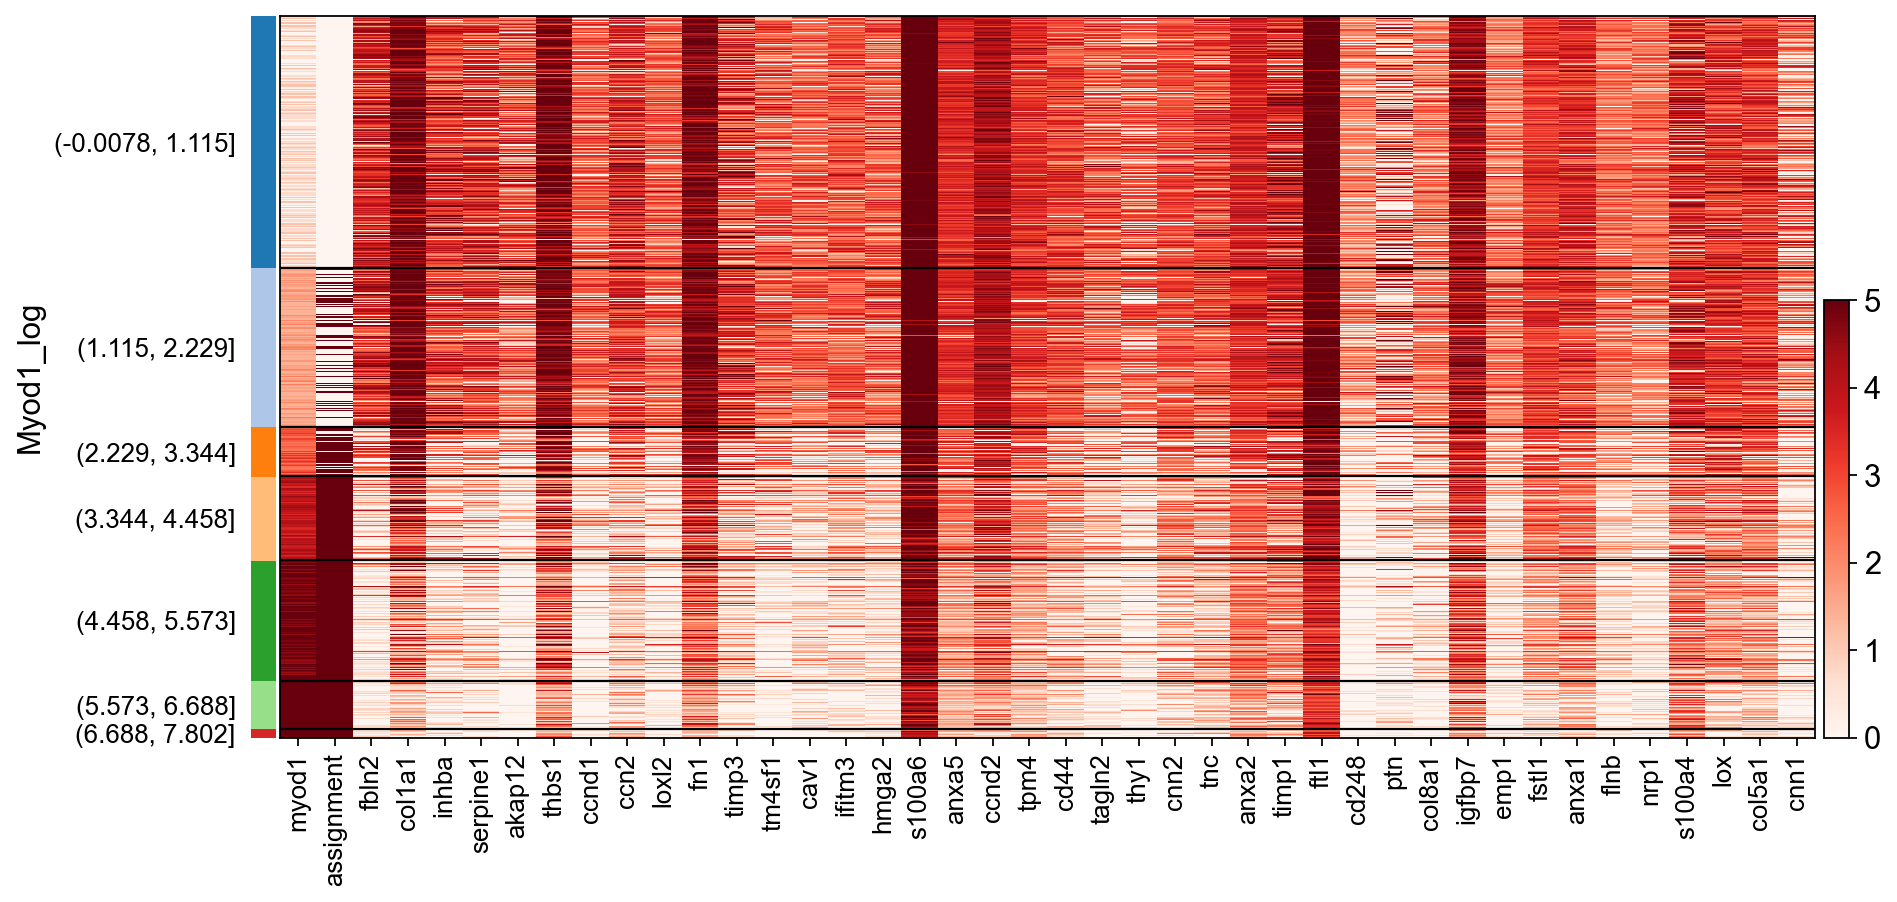

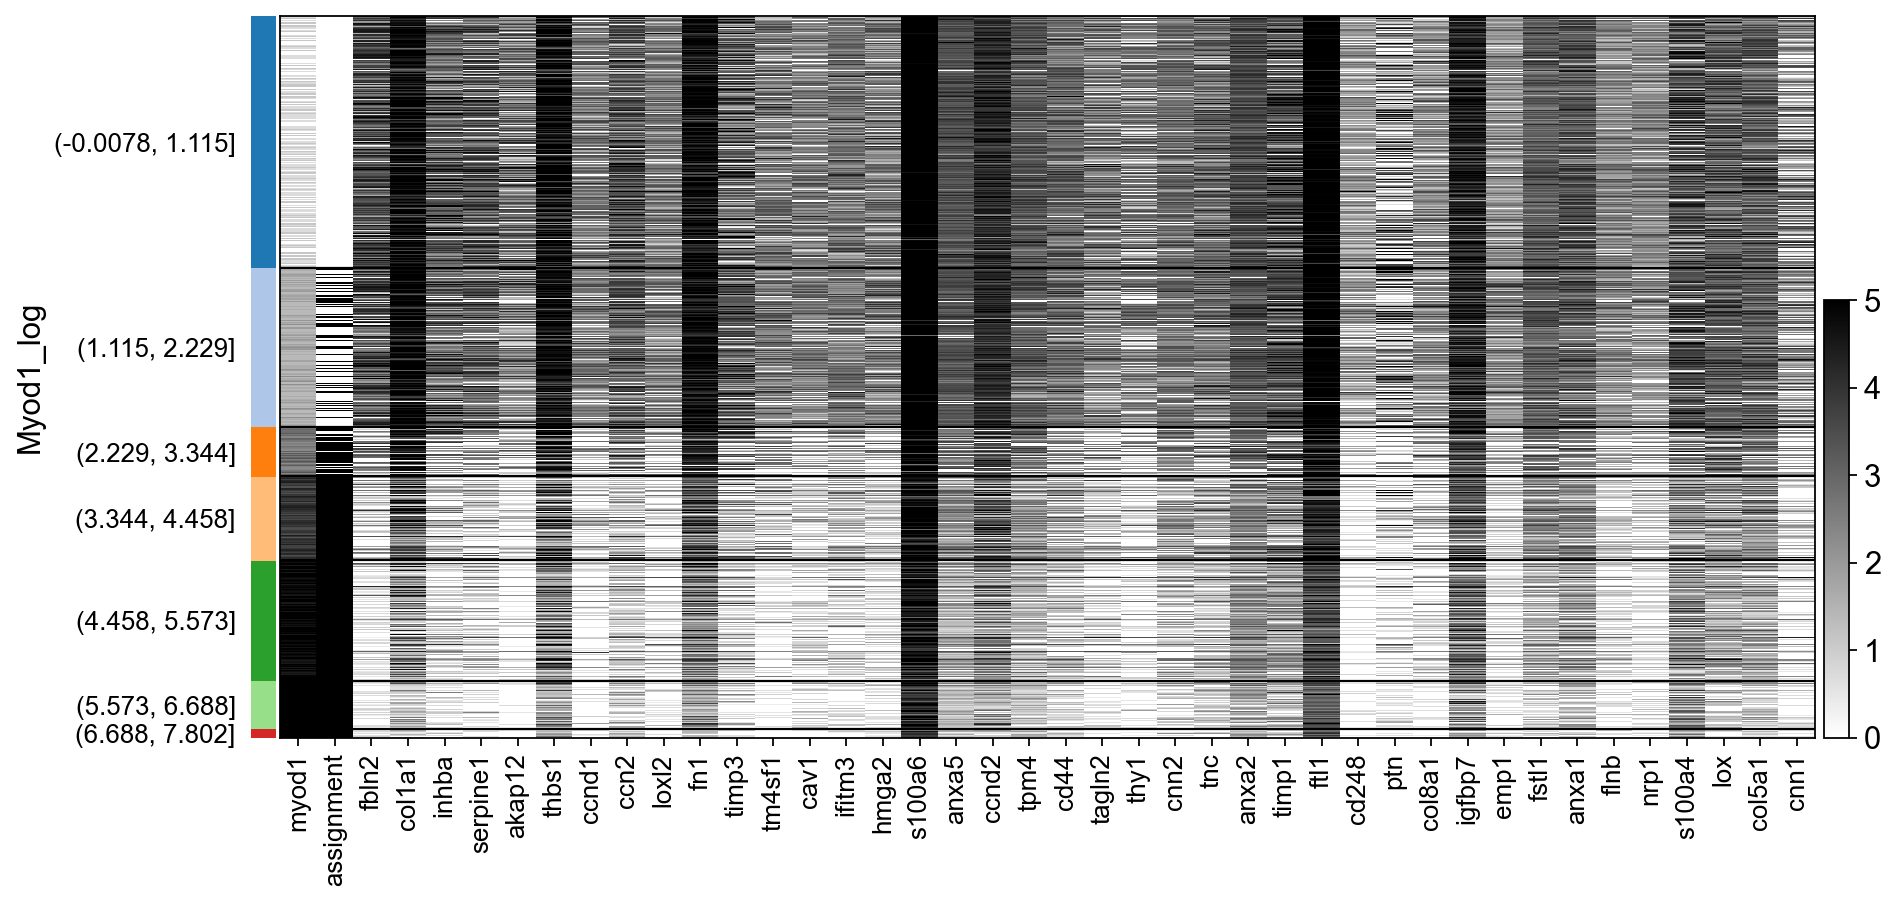

not found: 
[]


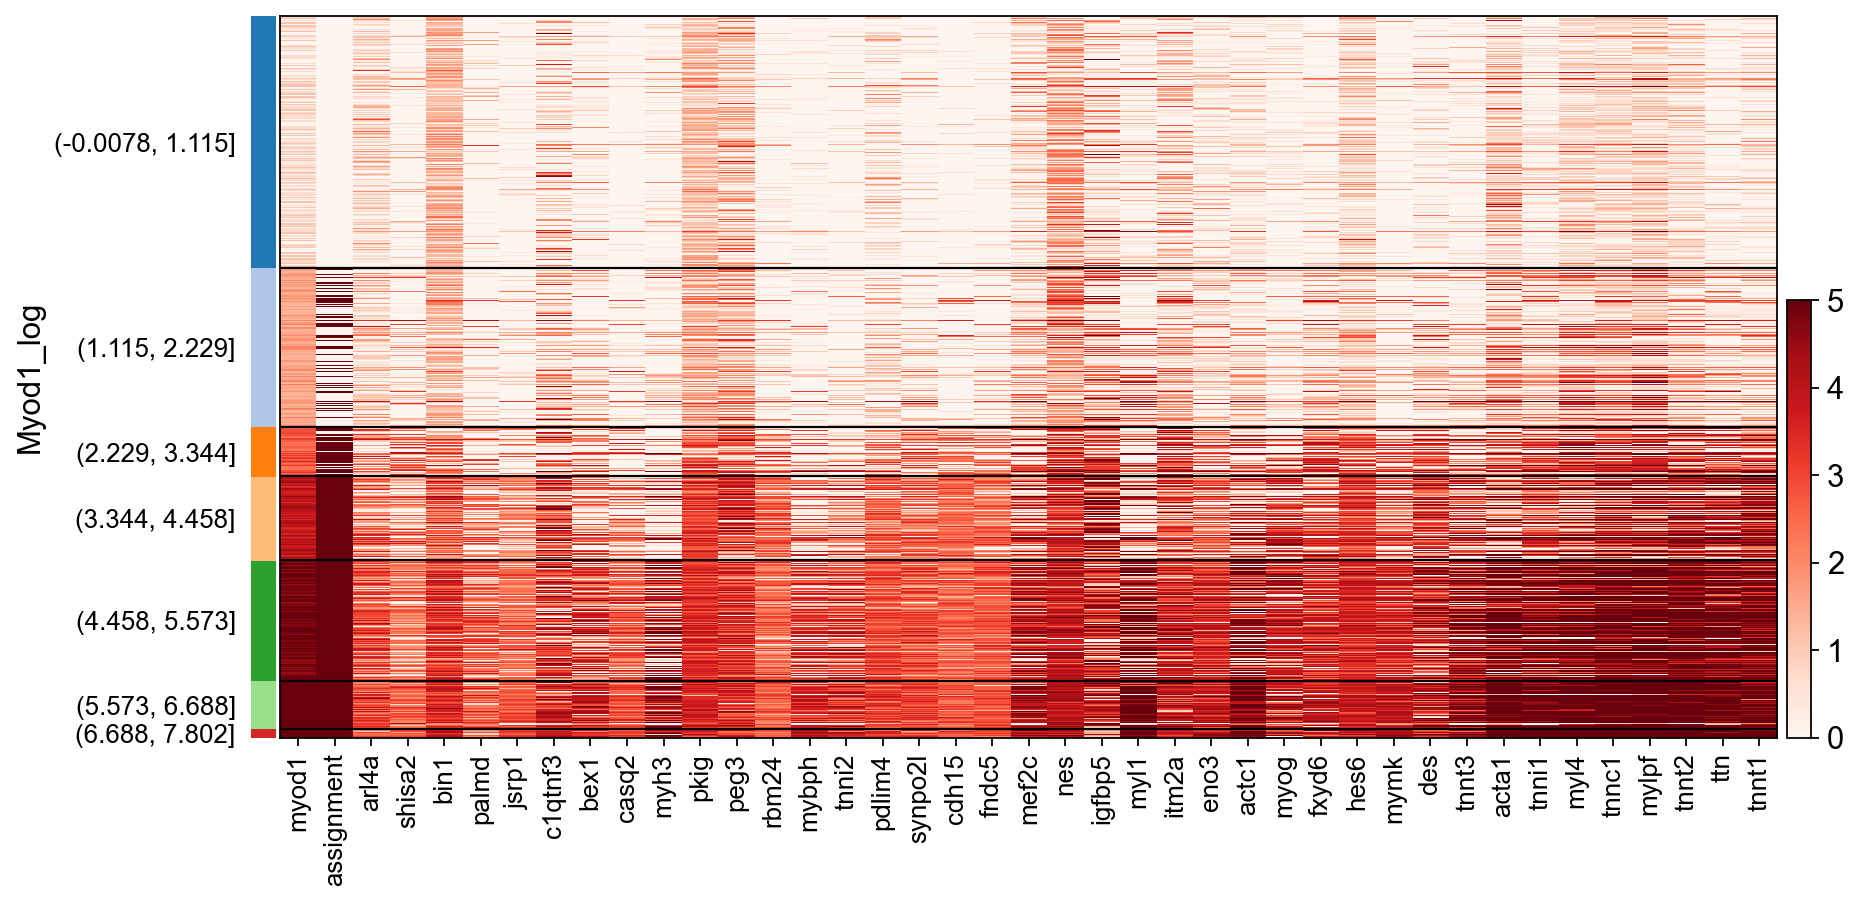

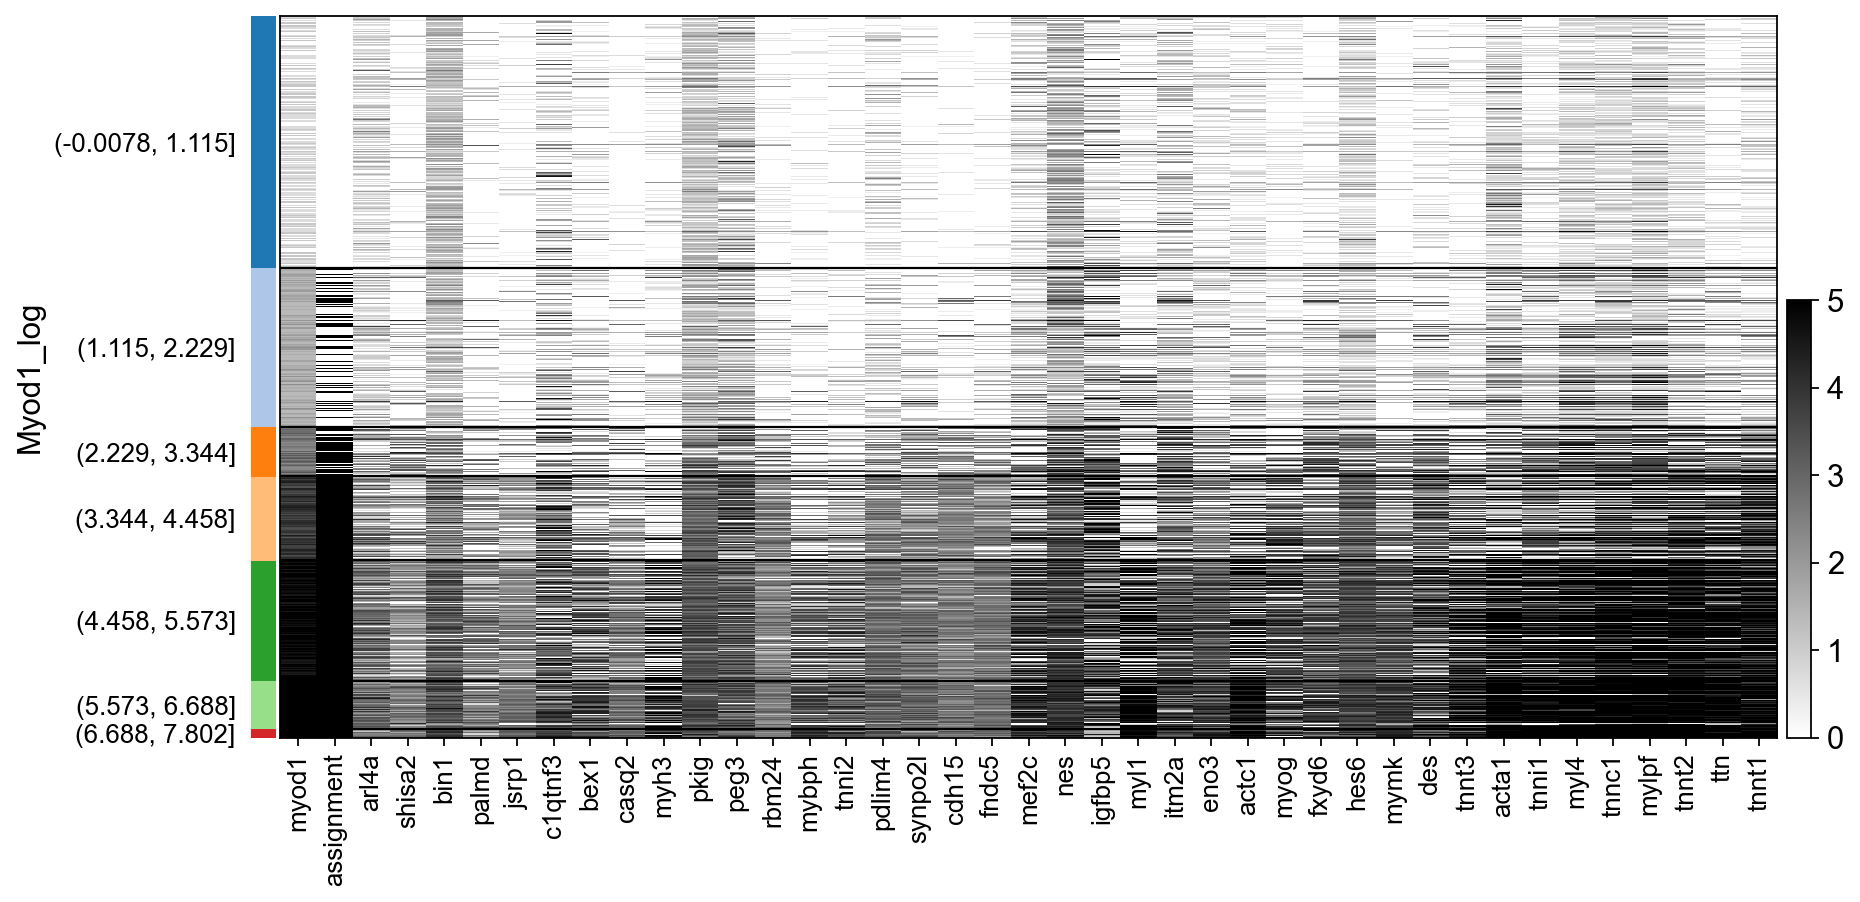

In [180]:
_ = plot_heatmap(
    adata=adata_proc_Myod1, 
    ref_list=myod1_down_genes, 
    tf="Myod1",
    suffix="_log", 
    max_log=5,
    save=None
)
_ = plot_heatmap(
    adata=adata_proc_Myod1, 
    ref_list=myod1_up_genes, 
    tf="Myod1",
    suffix="_log", 
    max_log=5,
    save="SI4b"
)

## Sox2

In [175]:
det = de.test.t_test(adata_proc_Sox2, grouping="inferred_category_real", is_logged=True)
tab = det.summary(qval_thres=0.01, mean_thres=0.1).sort_values("log2fc")
sox2_down_genes = tab["gene"].values[:40]
sox2_up_genes = tab["gene"].values[-40:]

not found: 
[]


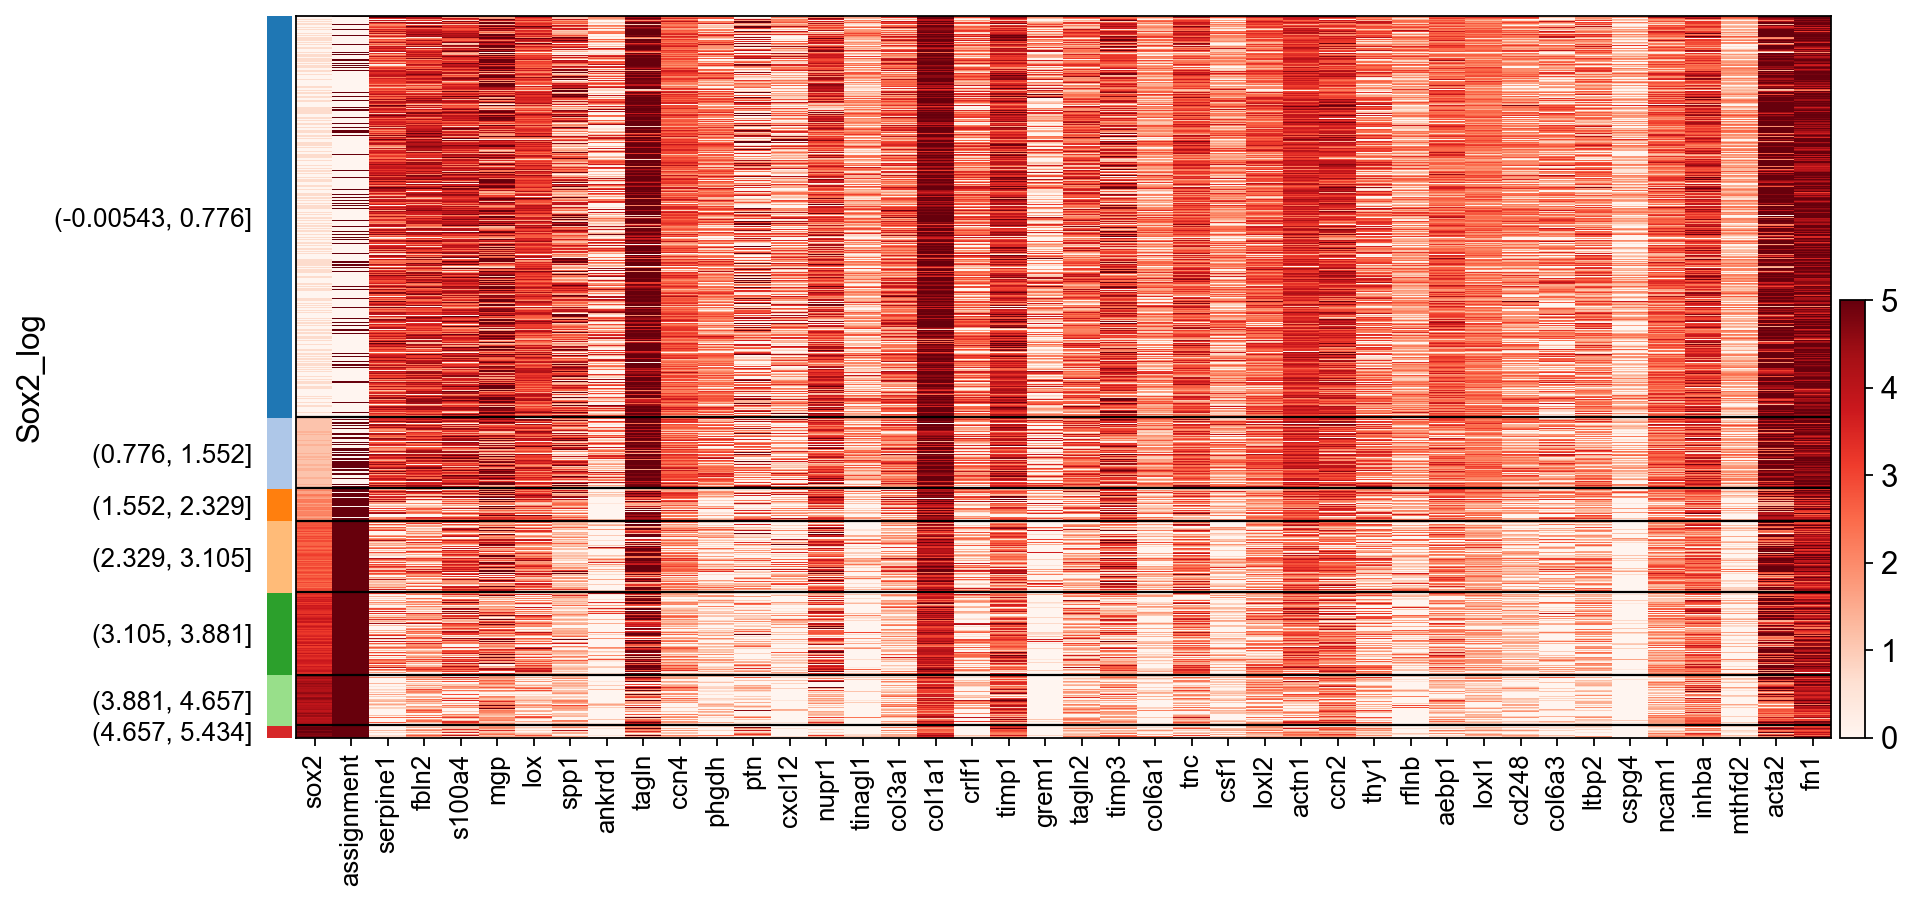

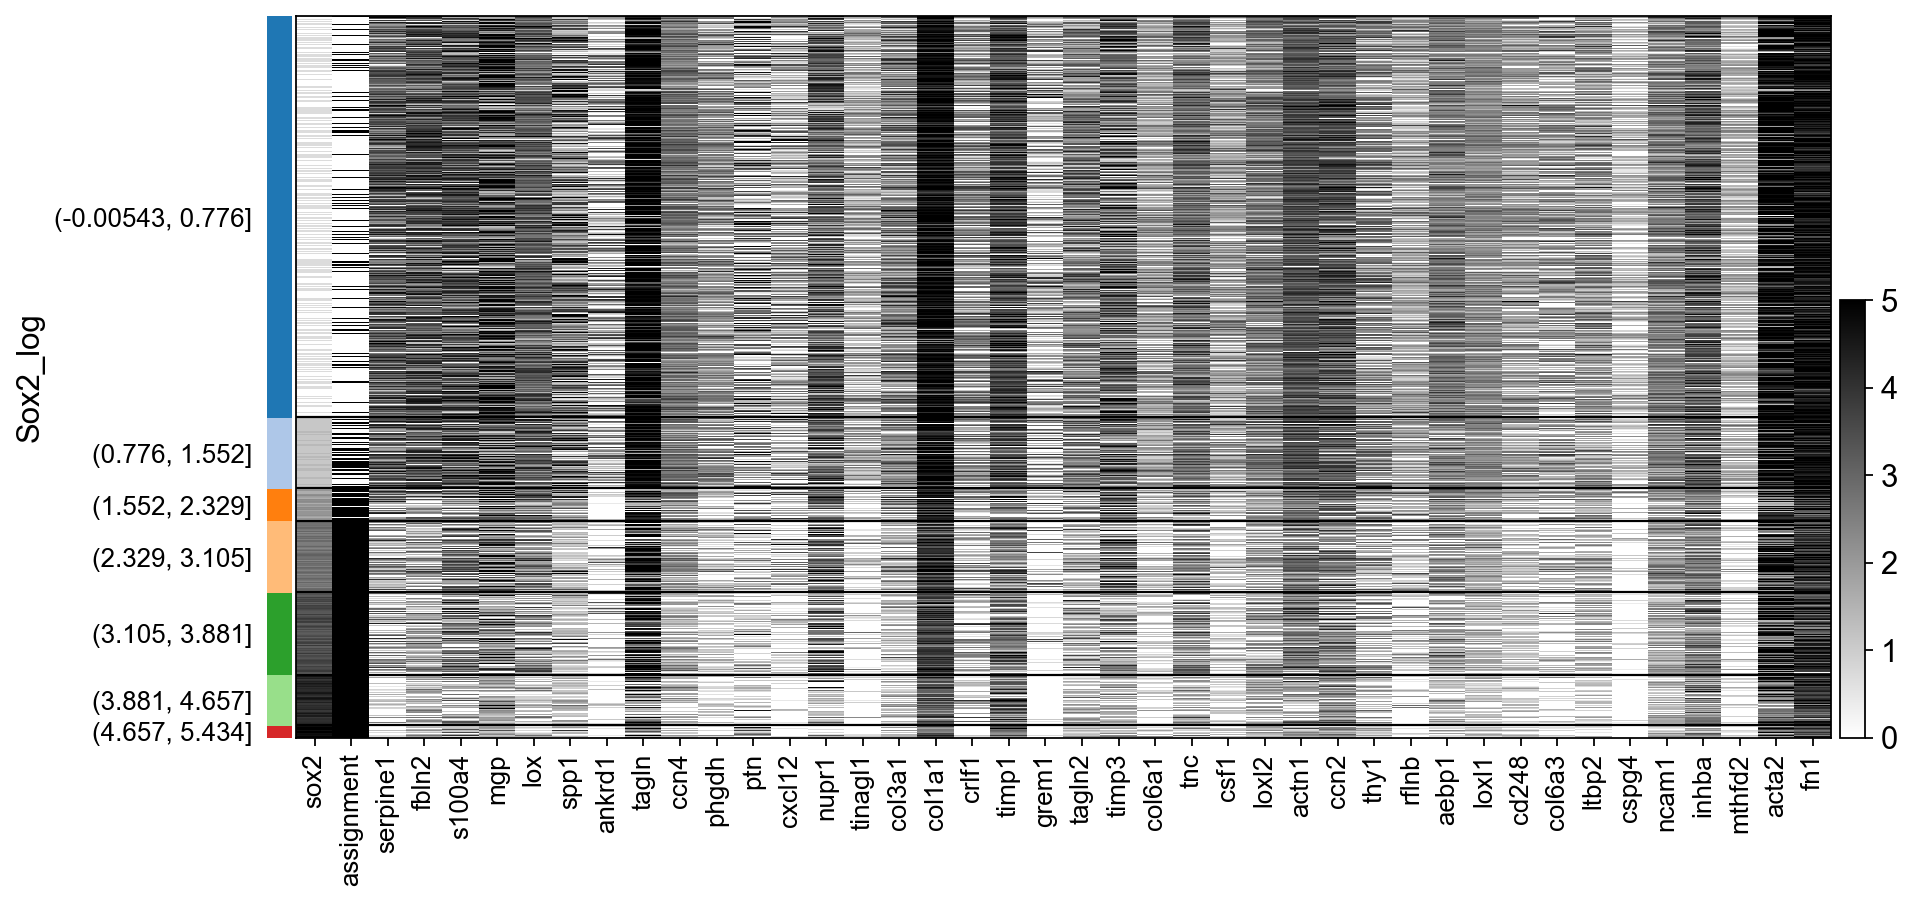

not found: 
[]


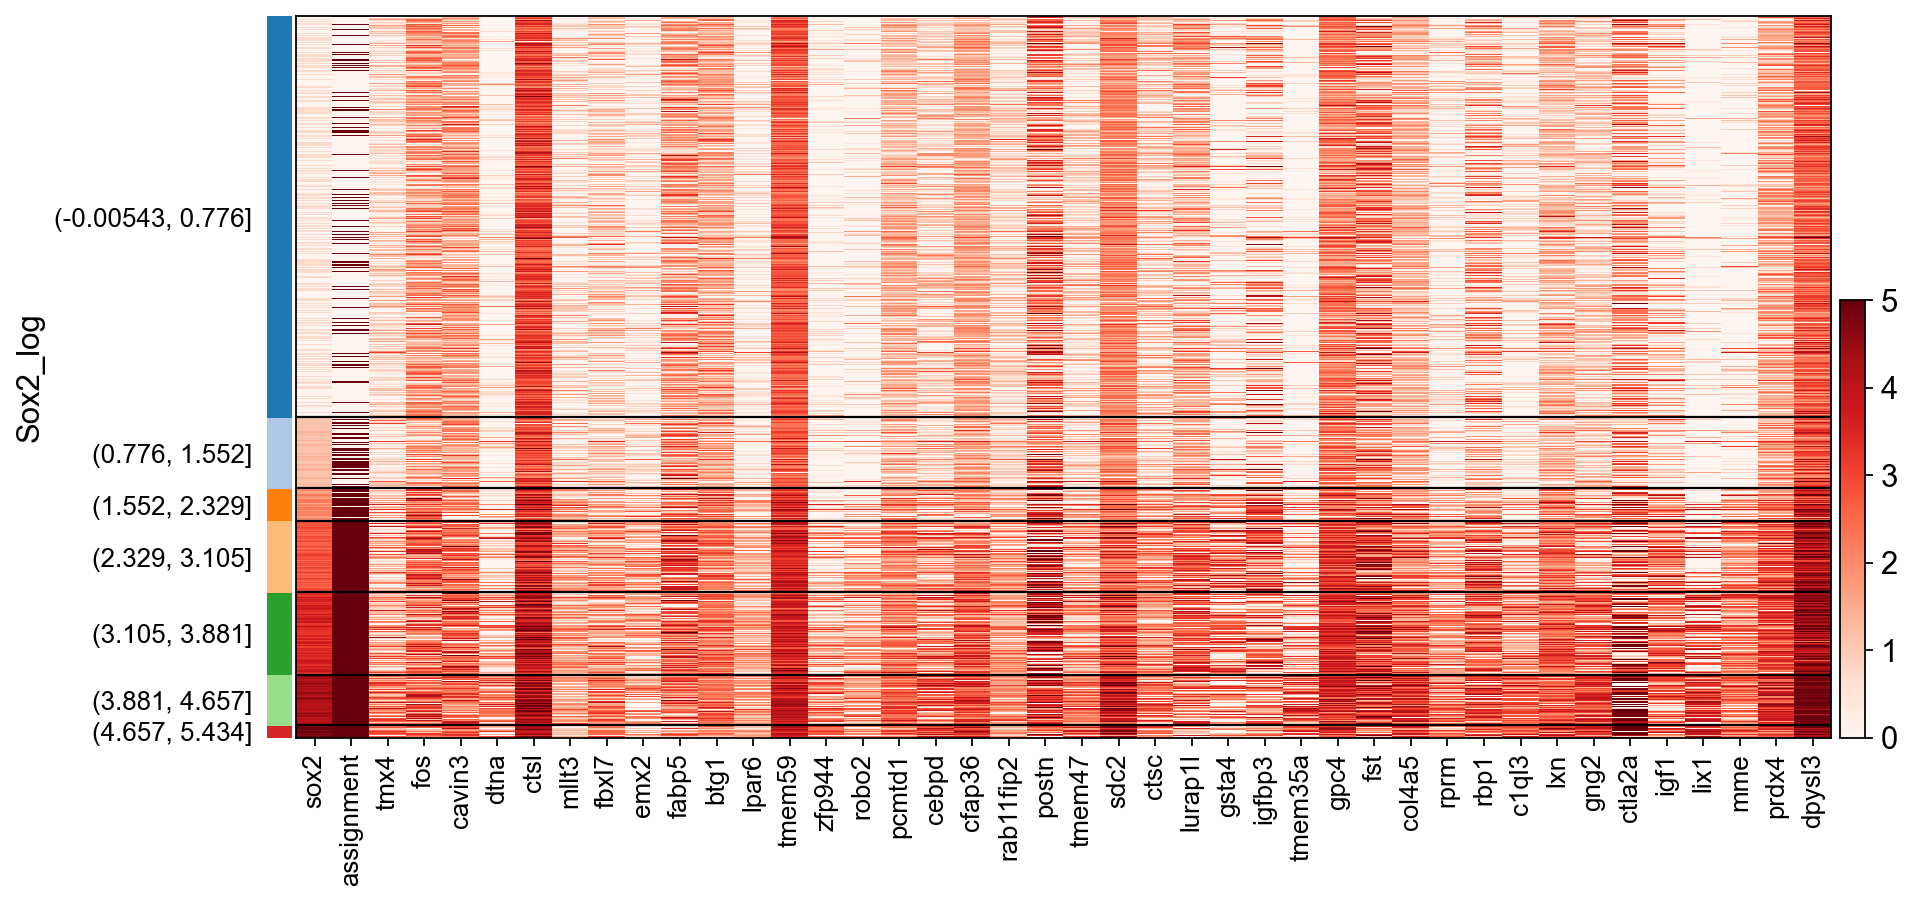

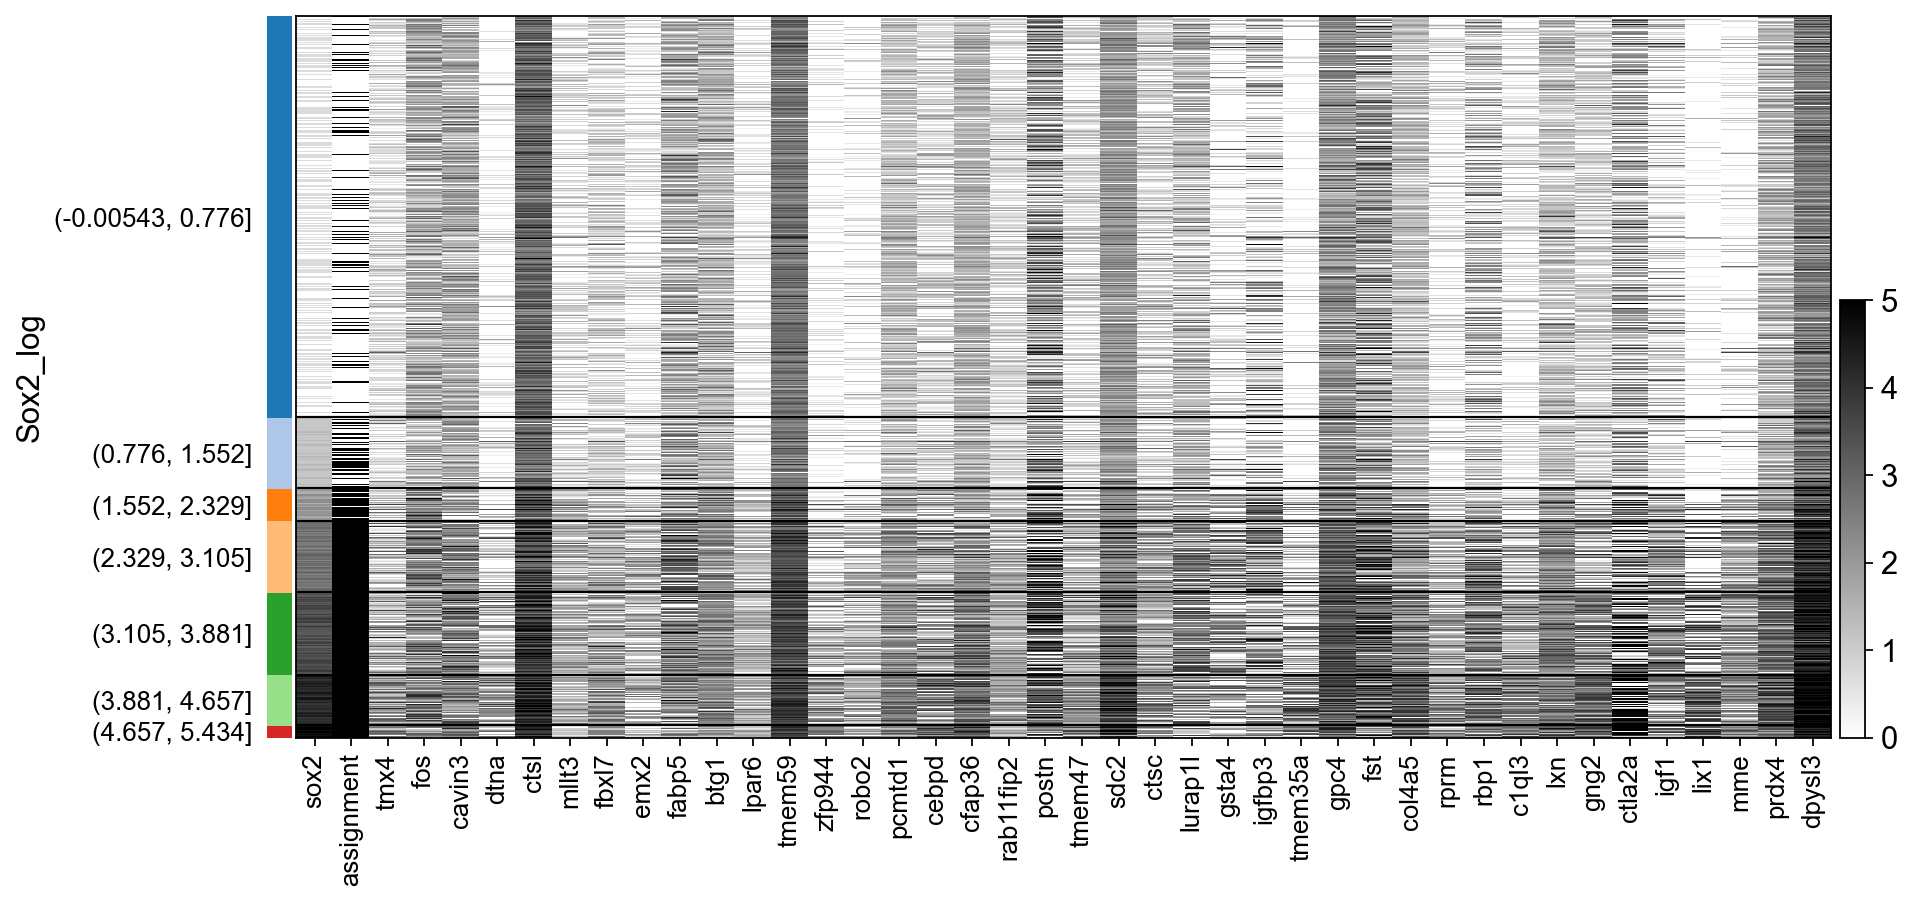

In [176]:
_ = plot_heatmap(
    adata=adata_proc_Sox2, 
    ref_list=sox2_down_genes, 
    tf="Sox2",
    suffix="_log", 
    max_log=5,
    save=None
)
_ = plot_heatmap(
    adata=adata_proc_Sox2, 
    ref_list=sox2_up_genes, 
    tf="Sox2",
    suffix="_log", 
    max_log=5,
    save="SI4c"
)

## Foxa2

In [177]:
det = de.test.t_test(adata_proc_Foxa2, grouping="inferred_category_real", is_logged=True)
tab = det.summary(qval_thres=0.01, mean_thres=0.1).sort_values("log2fc")
foxa2_down_genes = tab["gene"].values[:40]
foxa2_up_genes = tab["gene"].values[-40:]

not found: 
[]


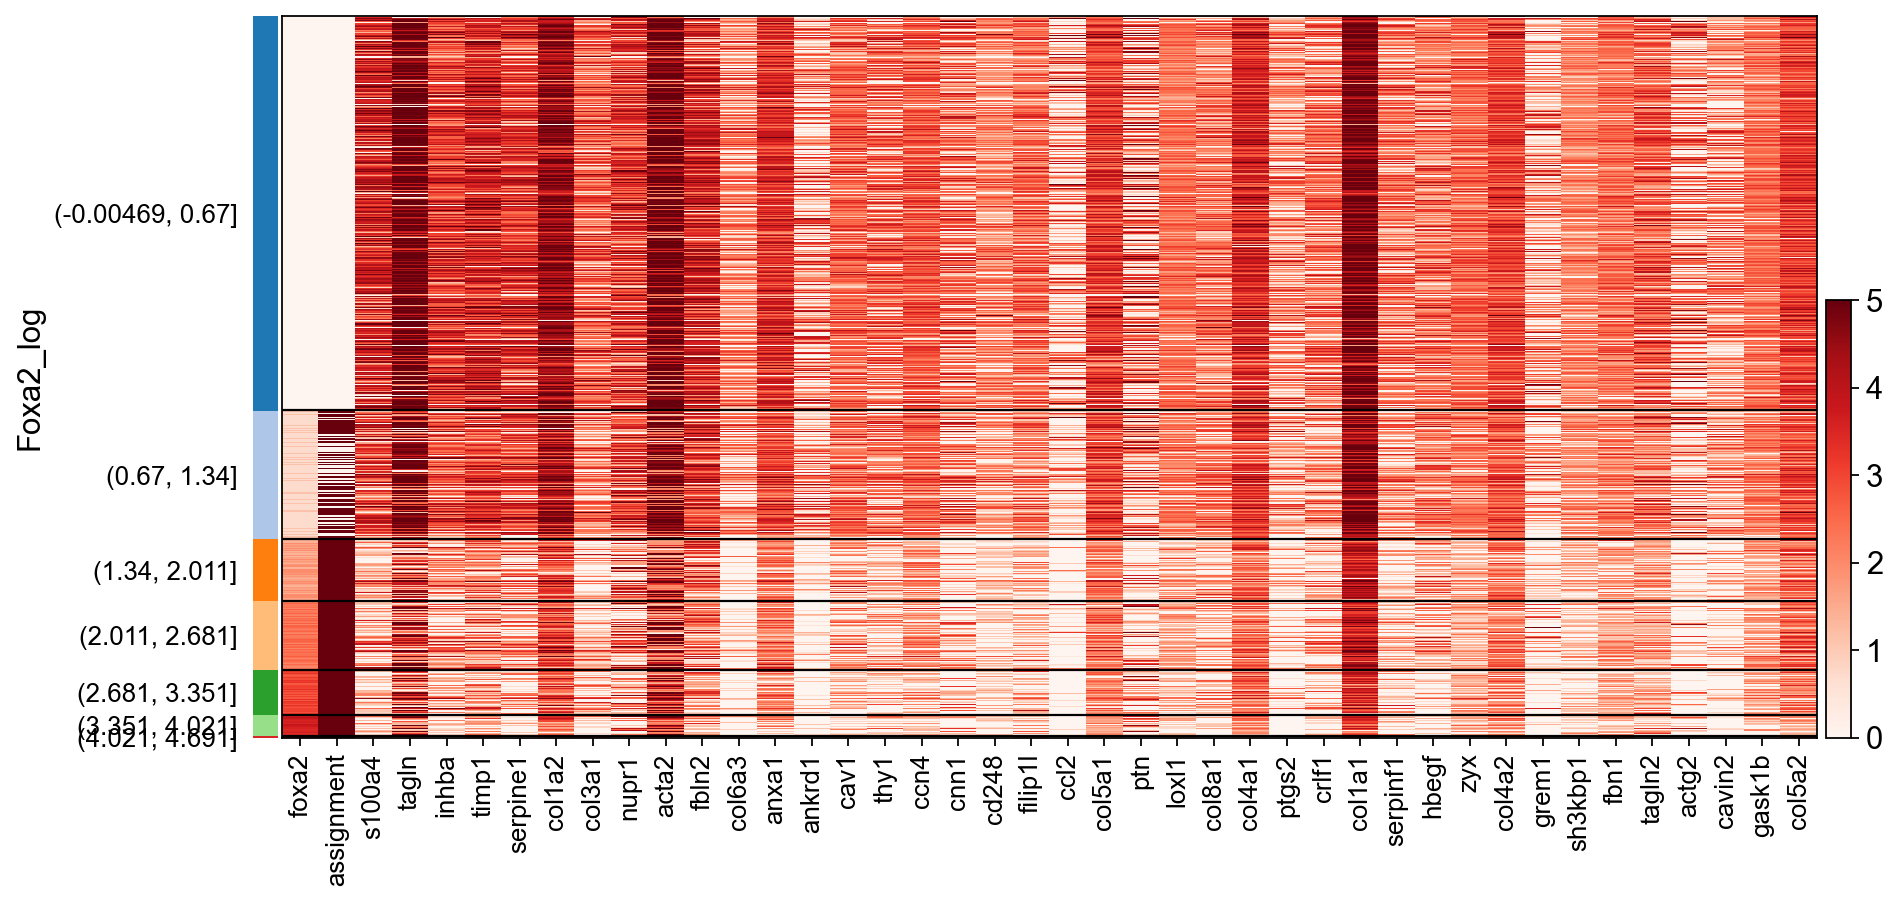

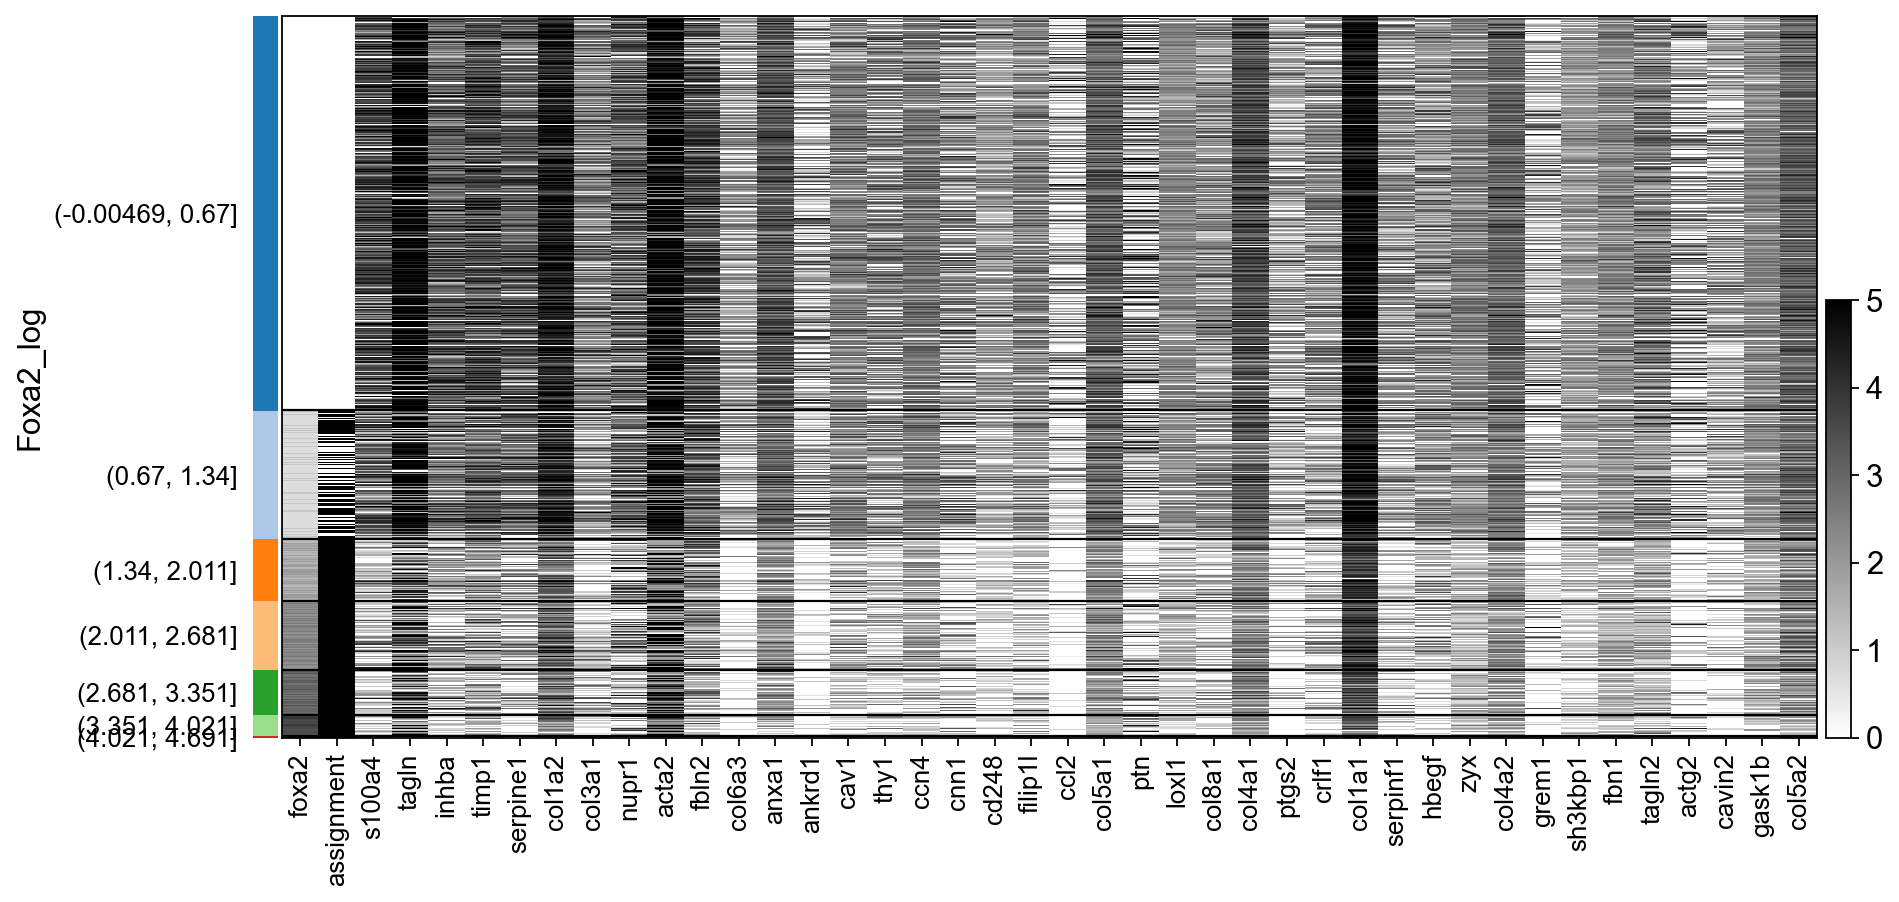

not found: 
[]


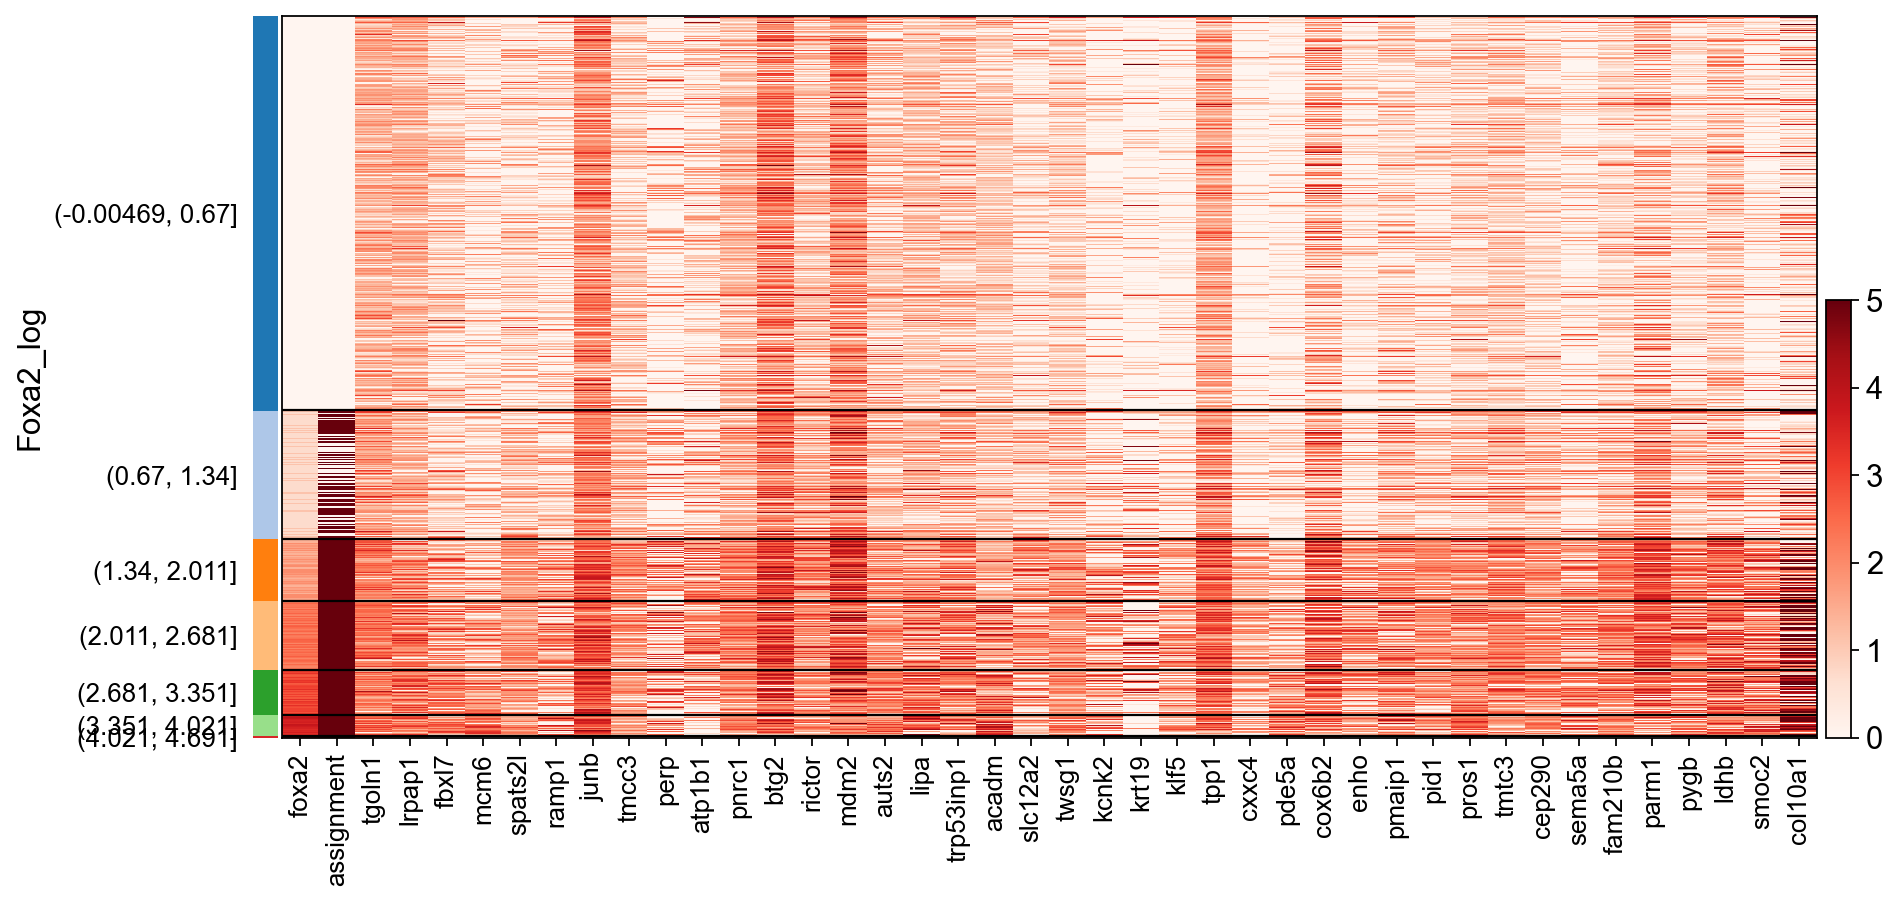

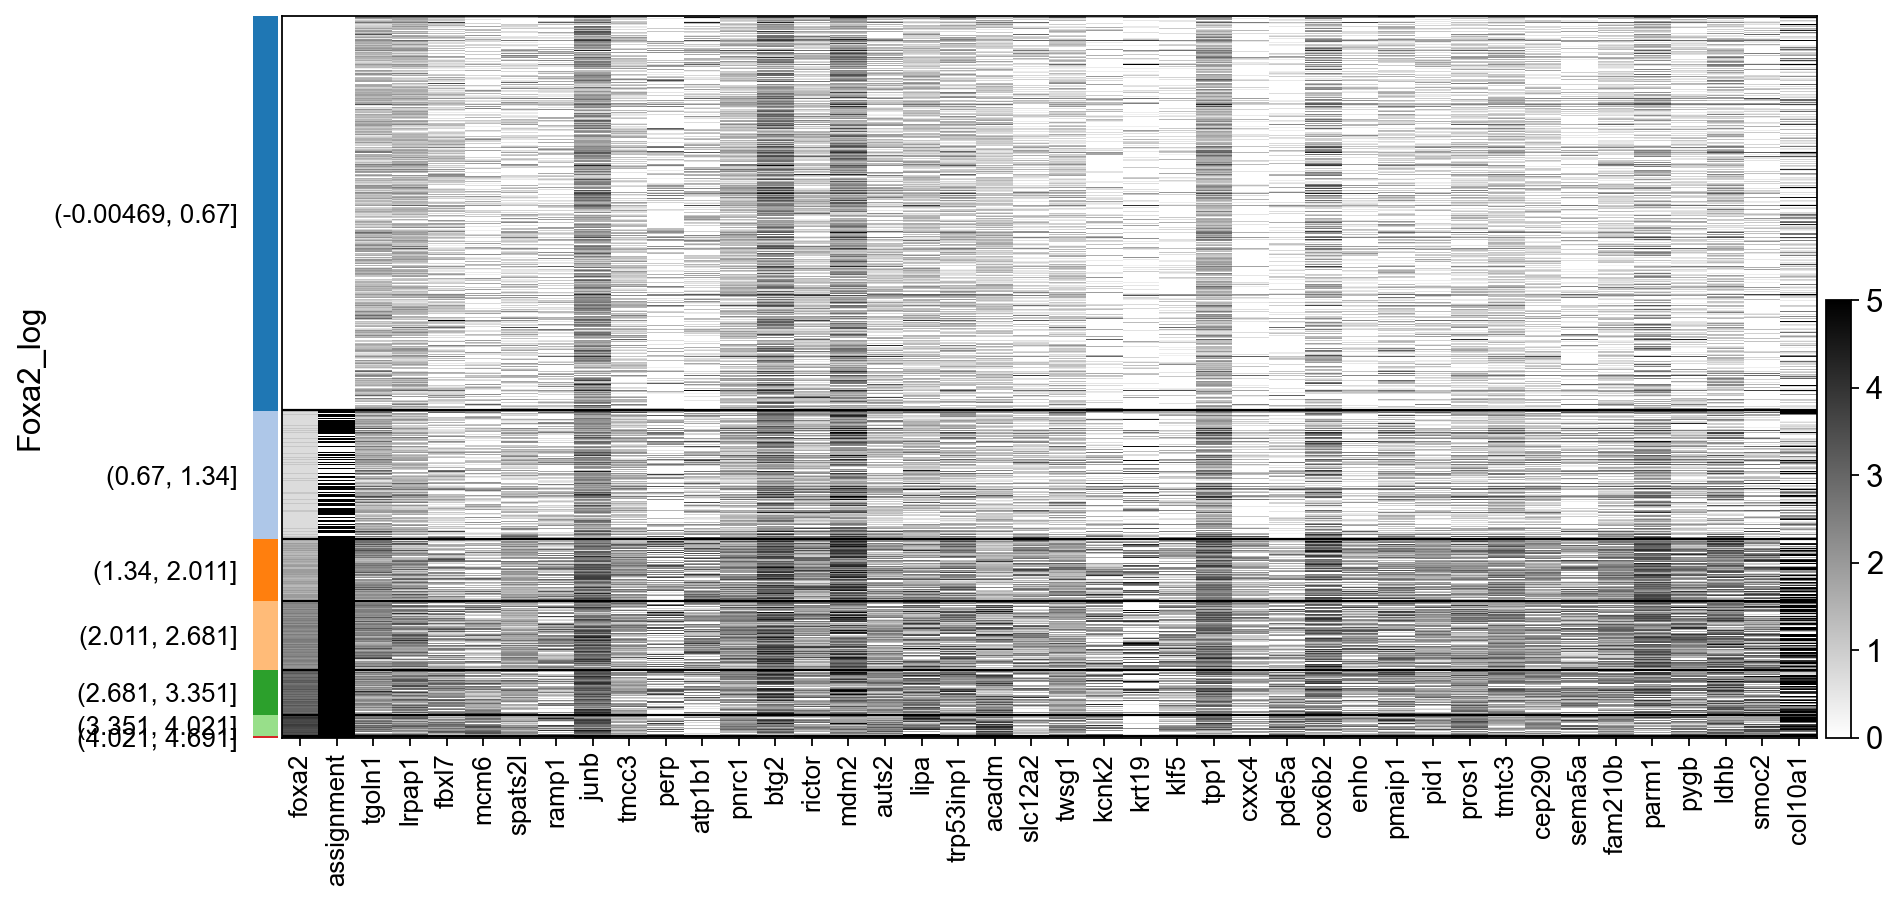

In [178]:
_ = plot_heatmap(
    adata=adata_proc_Foxa2, 
    ref_list=foxa2_down_genes, 
    tf="Foxa2",
    suffix="_log", 
    max_log=5,
    save=None
)
_ = plot_heatmap(
    adata=adata_proc_Foxa2, 
    ref_list=foxa2_up_genes, 
    tf="Foxa2",
    suffix="_log", 
    max_log=5,
    save="SI4d"
)

# Statistical fate interactions on expression level

In [13]:
processing_continuous = "_log"

Take out empty conditions:

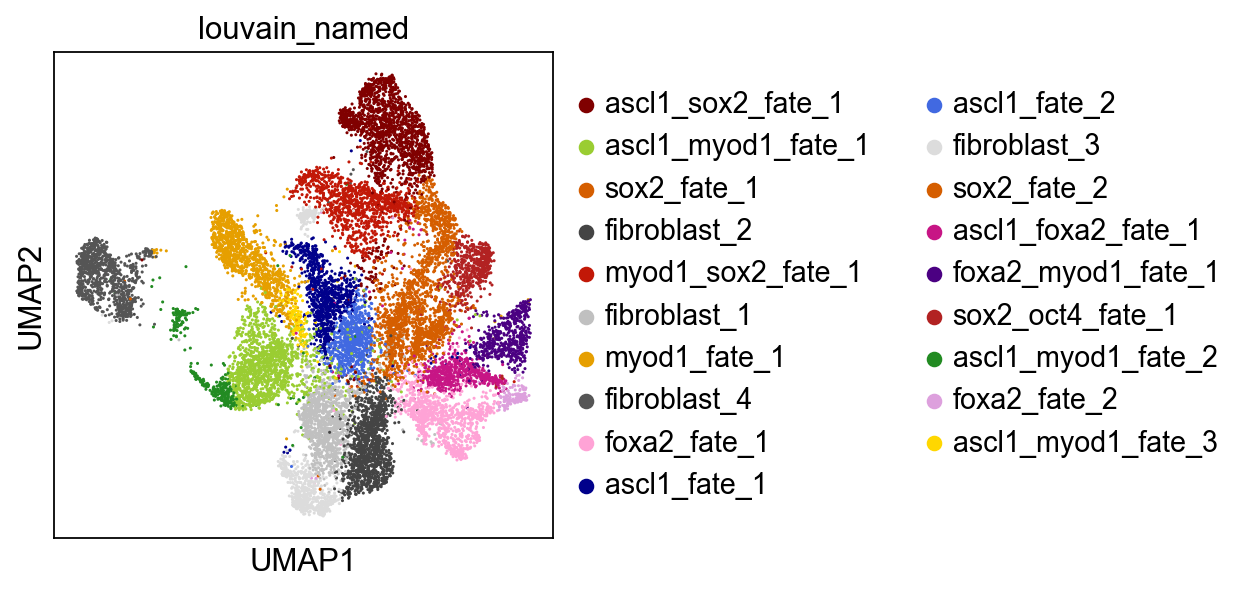

In [14]:
sc.pl.umap(adata_proc, color="louvain_named")

In [15]:
adata_proc_de_interactions = adata_proc[
    [x not in ['fibroblast_4'] 
     for x in adata_proc.obs["louvain_named"].values], :
].copy()

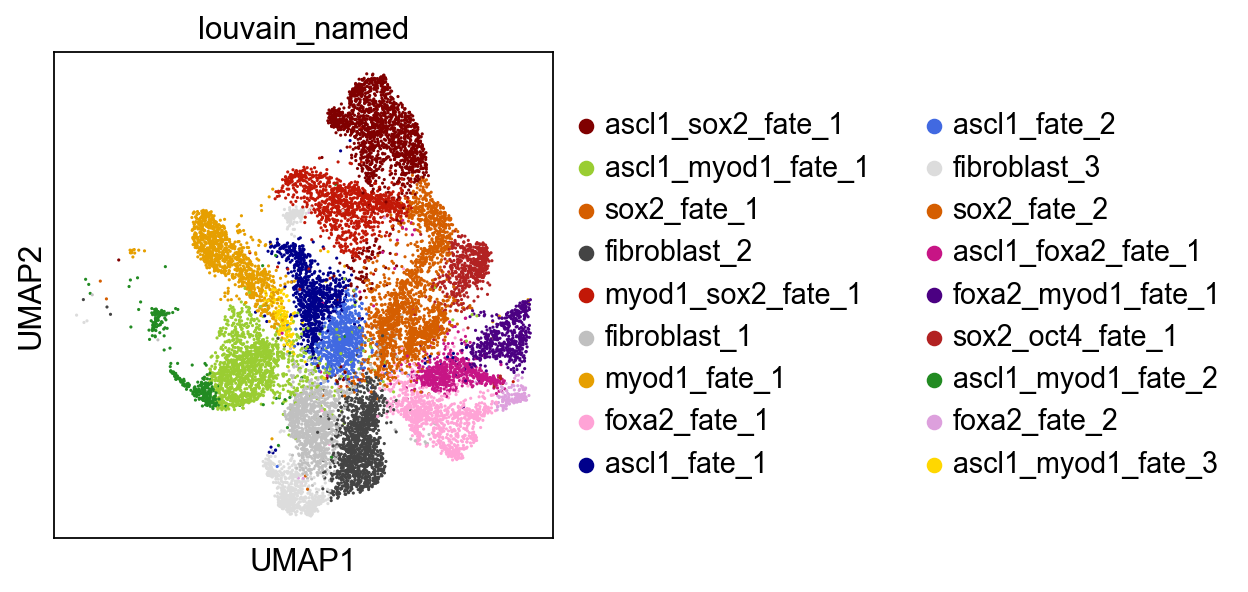

In [16]:
sc.pl.umap(adata_proc_de_interactions, color="louvain_named")

Add ratios into adata:

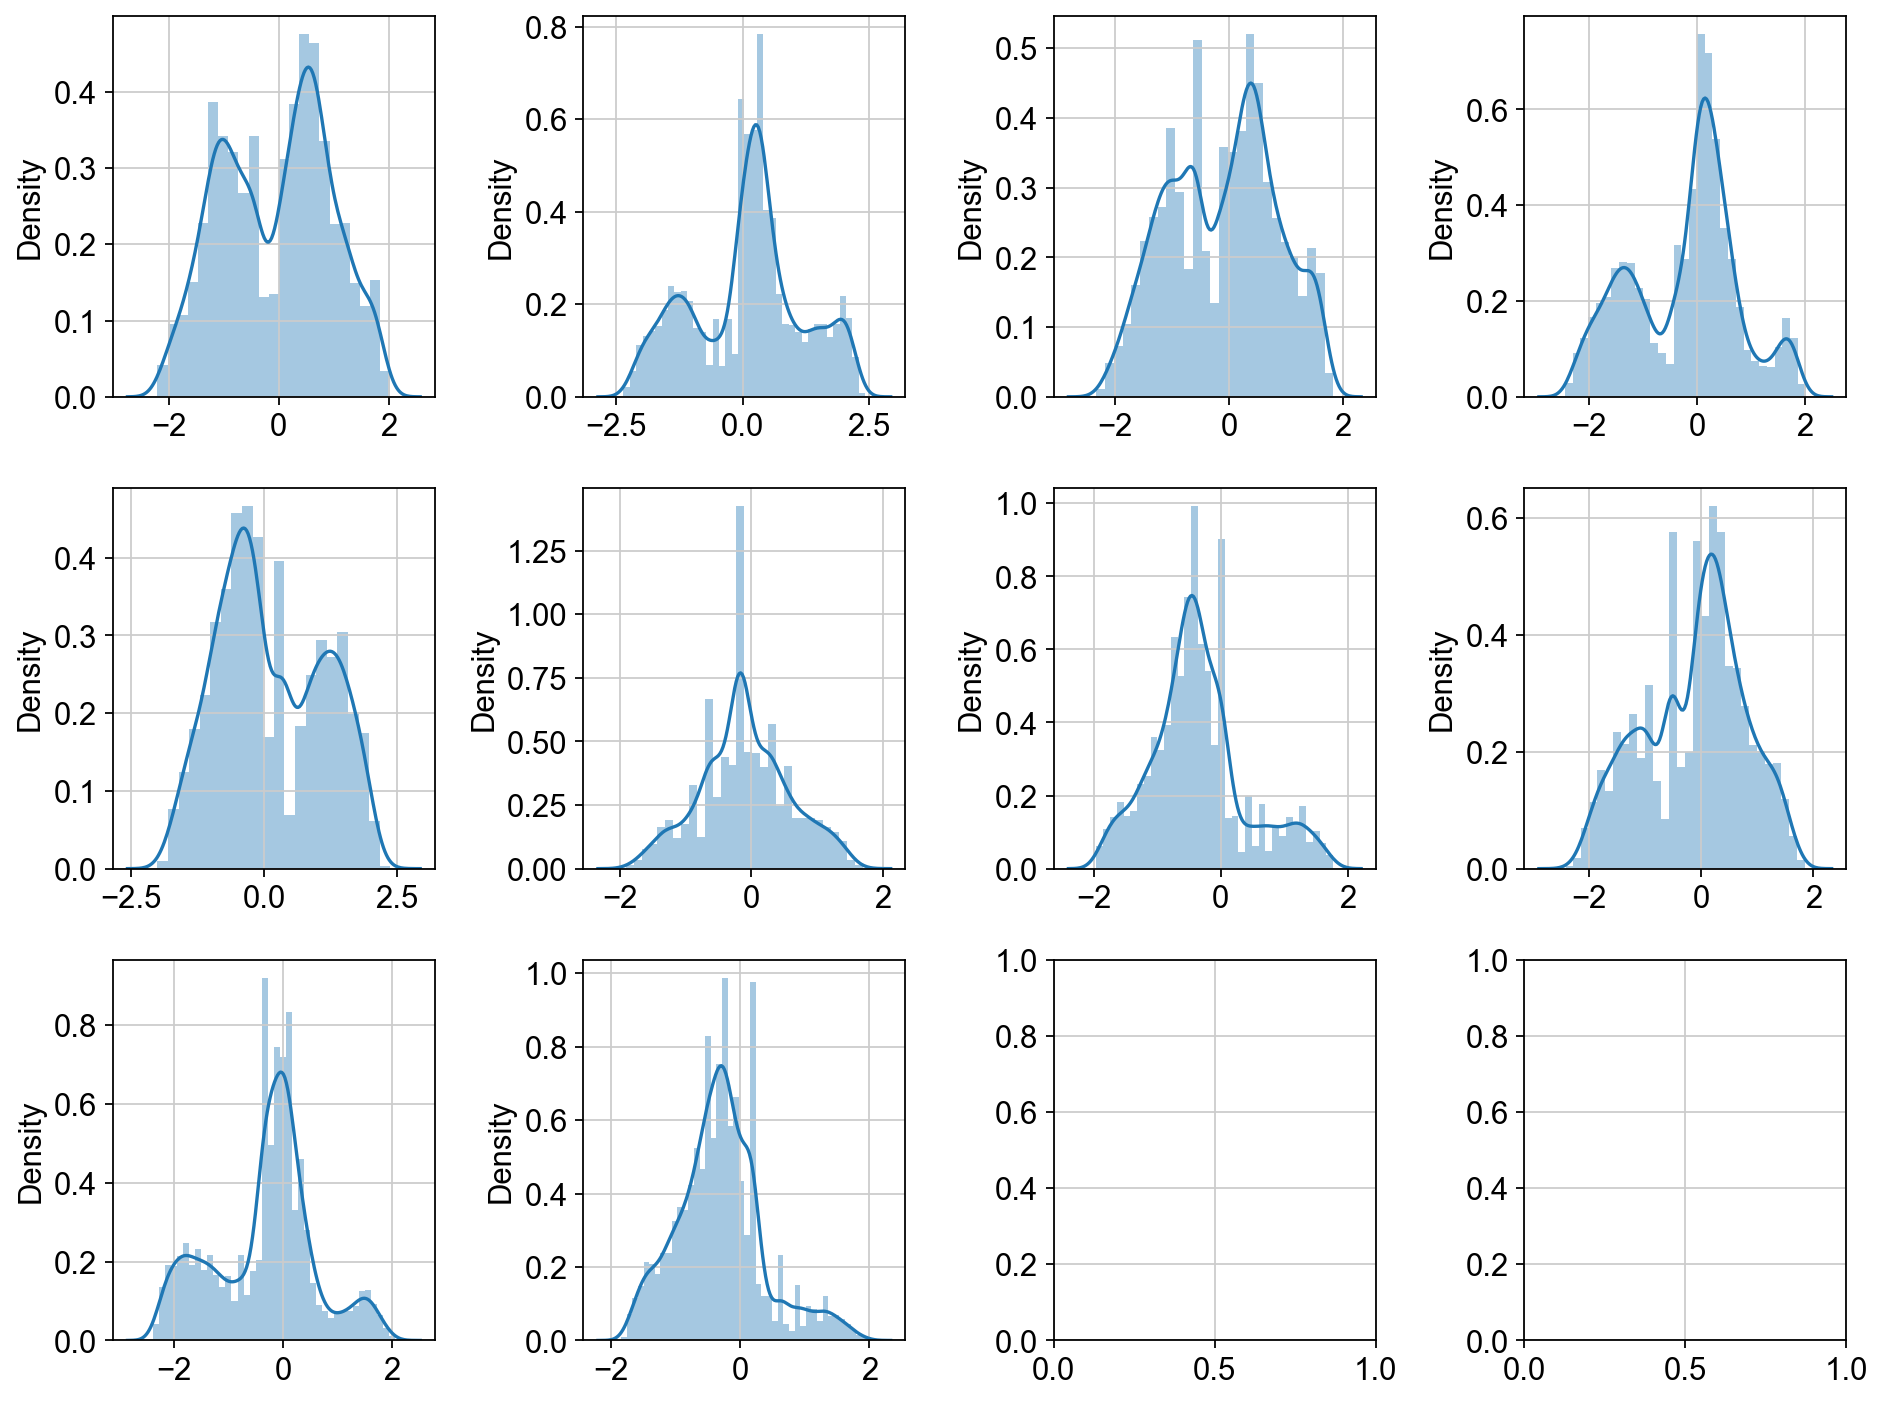

In [17]:
q = 1.
ratios = {}
for i, x in enumerate(constructs):
    for y in constructs[(i+1):]:
        ratios[f"ratio_{x}_{y}"] = [x + processing_continuous, y + processing_continuous]
ncols = 4
nrows = len(ratios) // ncols + int(len(ratios) % ncols > 0)
for k, v in ratios.items():
    # Set ratio to zero (so that ignored by linear model) if either one is zero:
    x = adata_proc_de_interactions.obs[v[0]].values
    y = adata_proc_de_interactions.obs[v[1]].values
    x = np.minimum(x / np.quantile(x, q=q), np.quantile(x, q=q))
    y = np.minimum(y / np.quantile(y, q=q), np.quantile(y, q=q))
    ratio = np.log(x / y)
    ratio[x == 0] = 0
    ratio[y == 0] = 0
    adata_proc_de_interactions.obs[k] = ratio
    
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*3))
for i, (k, v) in enumerate(ratios.items()):
    j = i % ncols
    i = i // ncols
    sb.distplot(adata_proc_de_interactions.obs[k].values[
        adata_proc_de_interactions.obs[k].values != 0], 
                ax=axs[i, j])
plt.tight_layout()
plt.show()

## Categorical conditions

### Fit model

In [18]:
de_test_summary = {}
if bool_recomp and False:
    single_factors = [
        "Ascl1_positive_condition",
        "Foxa2_positive_condition",
        "Myod1_positive_condition",
        "Oct4_positive_condition",
        "Sox2_positive_condition",
    ]
    double_interactions_to_model = [
        "Ascl1_positive_condition:Foxa2_positive_condition",
        "Ascl1_positive_condition:Myod1_positive_condition",
        "Ascl1_positive_condition:Oct4_positive_condition",
        "Ascl1_positive_condition:Sox2_positive_condition",
        "Foxa2_positive_condition:Myod1_positive_condition",
        "Foxa2_positive_condition:Oct4_positive_condition",
        "Foxa2_positive_condition:Sox2_positive_condition",
        "Myod1_positive_condition:Oct4_positive_condition",
        "Myod1_positive_condition:Sox2_positive_condition",
        "Oct4_positive_condition:Sox2_positive_condition", 
    ]
    adata_temp = anndata.AnnData(
        np.asarray(adata_proc_de_interactions.raw.X.todense()),
        obs=adata_proc_de_interactions.obs,
        var=adata_proc_de_interactions.raw.var)
    sc.pp.filter_genes(adata_temp, min_cells=100)
    det = de.test.wald(
        data=adata_temp,
        formula_loc="~1 + " + str("+".join(single_factors)) + "+" + 
            str("+".join(double_interactions_to_model)),
        as_numeric=[],
        size_factors=adata_temp.obs["sf"].values,
        coef_to_test="Ascl1_positive_condition[T.True]",
        sample_description=adata_temp.obs,
        quick_scale=False,
        init_b=np.zeros((1, adata_temp.shape[1],), dtype="float32"),
        #batch_size=(32, int(1e9)),  # change to (32, int(1e9)) for reduced memory profile, but slower,
        backend="numpy",
    )
    del adata_temp
    print(det.model_estim.input_data.loc_names)
    # Test intercept:
    for x in ["Intercept"]:
        coef_to_test=[
            x_coef for x_coef in det.model_estim.input_data.loc_names
            if "".join(x_coef.split("[T.True]")) == x
        ]
        print("testing %s via %s" % (x, str(coef_to_test)))
        tab = de.test.wald_repeated(
            det,
            coef_to_test=coef_to_test
        ).summary()
        for i, x_coef in enumerate(det.model_estim.input_data.loc_names):
            if "".join(x_coef.split("[T.True]")) == x:
                tab[x_coef] = det.model_estim.a_var[i, :]
        de_test_summary[coef_to_test[0]] = tab
    # Test double interaction effects:
    for x in double_interactions_to_model:
        coef_to_test=[
            x_coef for x_coef in det.model_estim.input_data.loc_names
            if "".join(x_coef.split("[T.True]")) == x
        ]
        print("testing %s via %s" % (x, str(coef_to_test)))
        tab = de.test.wald_repeated(
            det,
            coef_to_test=coef_to_test
        ).summary()
        for i, x_coef in enumerate(det.model_estim.input_data.loc_names):
            if "".join(x_coef.split("[T.True]")) == x:
                tab[x_coef] = det.model_estim.a_var[i, :]
        de_test_summary[coef_to_test[0]] = tab
    # Test single factors effects:
    for x in single_factors:
        coef_to_test=[
            x_coef for x_coef in det.model_estim.input_data.loc_names
            if "".join(x_coef.split("[T.True]")) == x
        ]
        print("testing %s via %s\n" % (x, str(coef_to_test)))
        tab = de.test.wald_repeated(
            det,
            coef_to_test=coef_to_test
        ).summary()
        for i, x_coef in enumerate(det.model_estim.input_data.loc_names):
            if "".join(x_coef.split("[T.True]")) == x:
                tab[x_coef] = det.model_estim.a_var[i, :]
        de_test_summary[coef_to_test[0]] = tab
    with open(dir_anndata + "de_test_summary.pickle", "wb") as f:
        pickle.dump(obj=de_test_summary, file=f)
    de_test_theta_loc = pd.DataFrame(
        det.model_estim.a_var.T,
        columns=det.model_estim.input_data.loc_names
    )
    with open(dir_anndata + "de_test_theta_loc.pickle", "wb") as f:
        pickle.dump(obj=de_test_theta_loc, file=f)
    de_test_theta_scale = pd.DataFrame(
        det.model_estim.b_var.T,
        columns=det.model_estim.input_data.scale_names
    )
    with open(dir_anndata + "de_test_theta_scale.pickle", "wb") as f:
        pickle.dump(obj=de_test_theta_scale, file=f)
else:
    de_test_summary = pickle.load(
        open(dir_anndata + "de_test_summary.pickle", 'rb'))
    de_test_theta_loc = pickle.load(
        open(dir_anndata + "de_test_theta_loc.pickle", 'rb'))
    de_test_theta_scale = pickle.load(
        open(dir_anndata + "de_test_theta_scale.pickle", 'rb'))

Assemble boolean mask of significant effects:
Do not mask Intercepts.

In [19]:
print(np.mean(de_test_summary["Intercept"][["qval"]].values < 0.01))

0.9824934439010561


In [20]:
de_test_theta_loc_significance = pd.DataFrame(np.concatenate([
    np.asarray(np.logical_and(
        de_test_summary[k][["qval"]].values < 0.01,
        de_test_summary["Intercept"][["qval"]].values < 0.01,
    ), dtype="int")
    for k in de_test_theta_loc.columns
], axis=1), columns=de_test_theta_loc.columns)

In [21]:
print(de_test_theta_loc_significance.sum(axis=0))

Intercept                                                            13862
Ascl1_positive_condition[T.True]                                      8932
Foxa2_positive_condition[T.True]                                      9037
Myod1_positive_condition[T.True]                                      9428
Oct4_positive_condition[T.True]                                       3069
Sox2_positive_condition[T.True]                                       8874
Ascl1_positive_condition[T.True]:Foxa2_positive_condition[T.True]     5783
Ascl1_positive_condition[T.True]:Myod1_positive_condition[T.True]     5539
Ascl1_positive_condition[T.True]:Oct4_positive_condition[T.True]      1953
Ascl1_positive_condition[T.True]:Sox2_positive_condition[T.True]      5806
Foxa2_positive_condition[T.True]:Myod1_positive_condition[T.True]     5176
Foxa2_positive_condition[T.True]:Oct4_positive_condition[T.True]      2159
Foxa2_positive_condition[T.True]:Sox2_positive_condition[T.True]      5271
Myod1_positive_condition[

In [22]:
de_test_theta_loc_notoverfitted = pd.DataFrame(np.concatenate([
    np.asarray(
        np.abs(de_test_theta_loc.values * de_test_theta_loc_significance.values).sum(axis=1, keepdims=True) < 100, 
        dtype="int")
    for k in de_test_theta_loc.columns
], axis=1), columns=de_test_theta_loc.columns)

In [23]:
print(de_test_theta_loc_notoverfitted.sum(axis=0))

Intercept                                                            13224
Ascl1_positive_condition[T.True]                                     13224
Foxa2_positive_condition[T.True]                                     13224
Myod1_positive_condition[T.True]                                     13224
Oct4_positive_condition[T.True]                                      13224
Sox2_positive_condition[T.True]                                      13224
Ascl1_positive_condition[T.True]:Foxa2_positive_condition[T.True]    13224
Ascl1_positive_condition[T.True]:Myod1_positive_condition[T.True]    13224
Ascl1_positive_condition[T.True]:Oct4_positive_condition[T.True]     13224
Ascl1_positive_condition[T.True]:Sox2_positive_condition[T.True]     13224
Foxa2_positive_condition[T.True]:Myod1_positive_condition[T.True]    13224
Foxa2_positive_condition[T.True]:Oct4_positive_condition[T.True]     13224
Foxa2_positive_condition[T.True]:Sox2_positive_condition[T.True]     13224
Myod1_positive_condition[

Check meta data of overfitted genes:

In [24]:
np.mean(np.all(de_test_theta_loc_significance.values, axis=1))

0.06166276844567298

In [25]:
np.mean(np.mean(de_test_theta_loc_significance.values, axis=1))

0.4234265362534552

In [26]:
np.mean(np.mean(de_test_theta_loc_significance.values, axis=1)[
    de_test_theta_loc_notoverfitted["Intercept"].values == 1.])

0.3854450241984271

In [27]:
np.mean(np.mean(de_test_theta_loc_significance.values, axis=1)[
    de_test_theta_loc_notoverfitted["Intercept"].values == 0.])

0.9909604519774011

Mask values in theta loc matrix:

In [28]:
de_test_theta_loc_masked = de_test_theta_loc * de_test_theta_loc_significance * de_test_theta_loc_notoverfitted

#### Check model estimates

Location model:

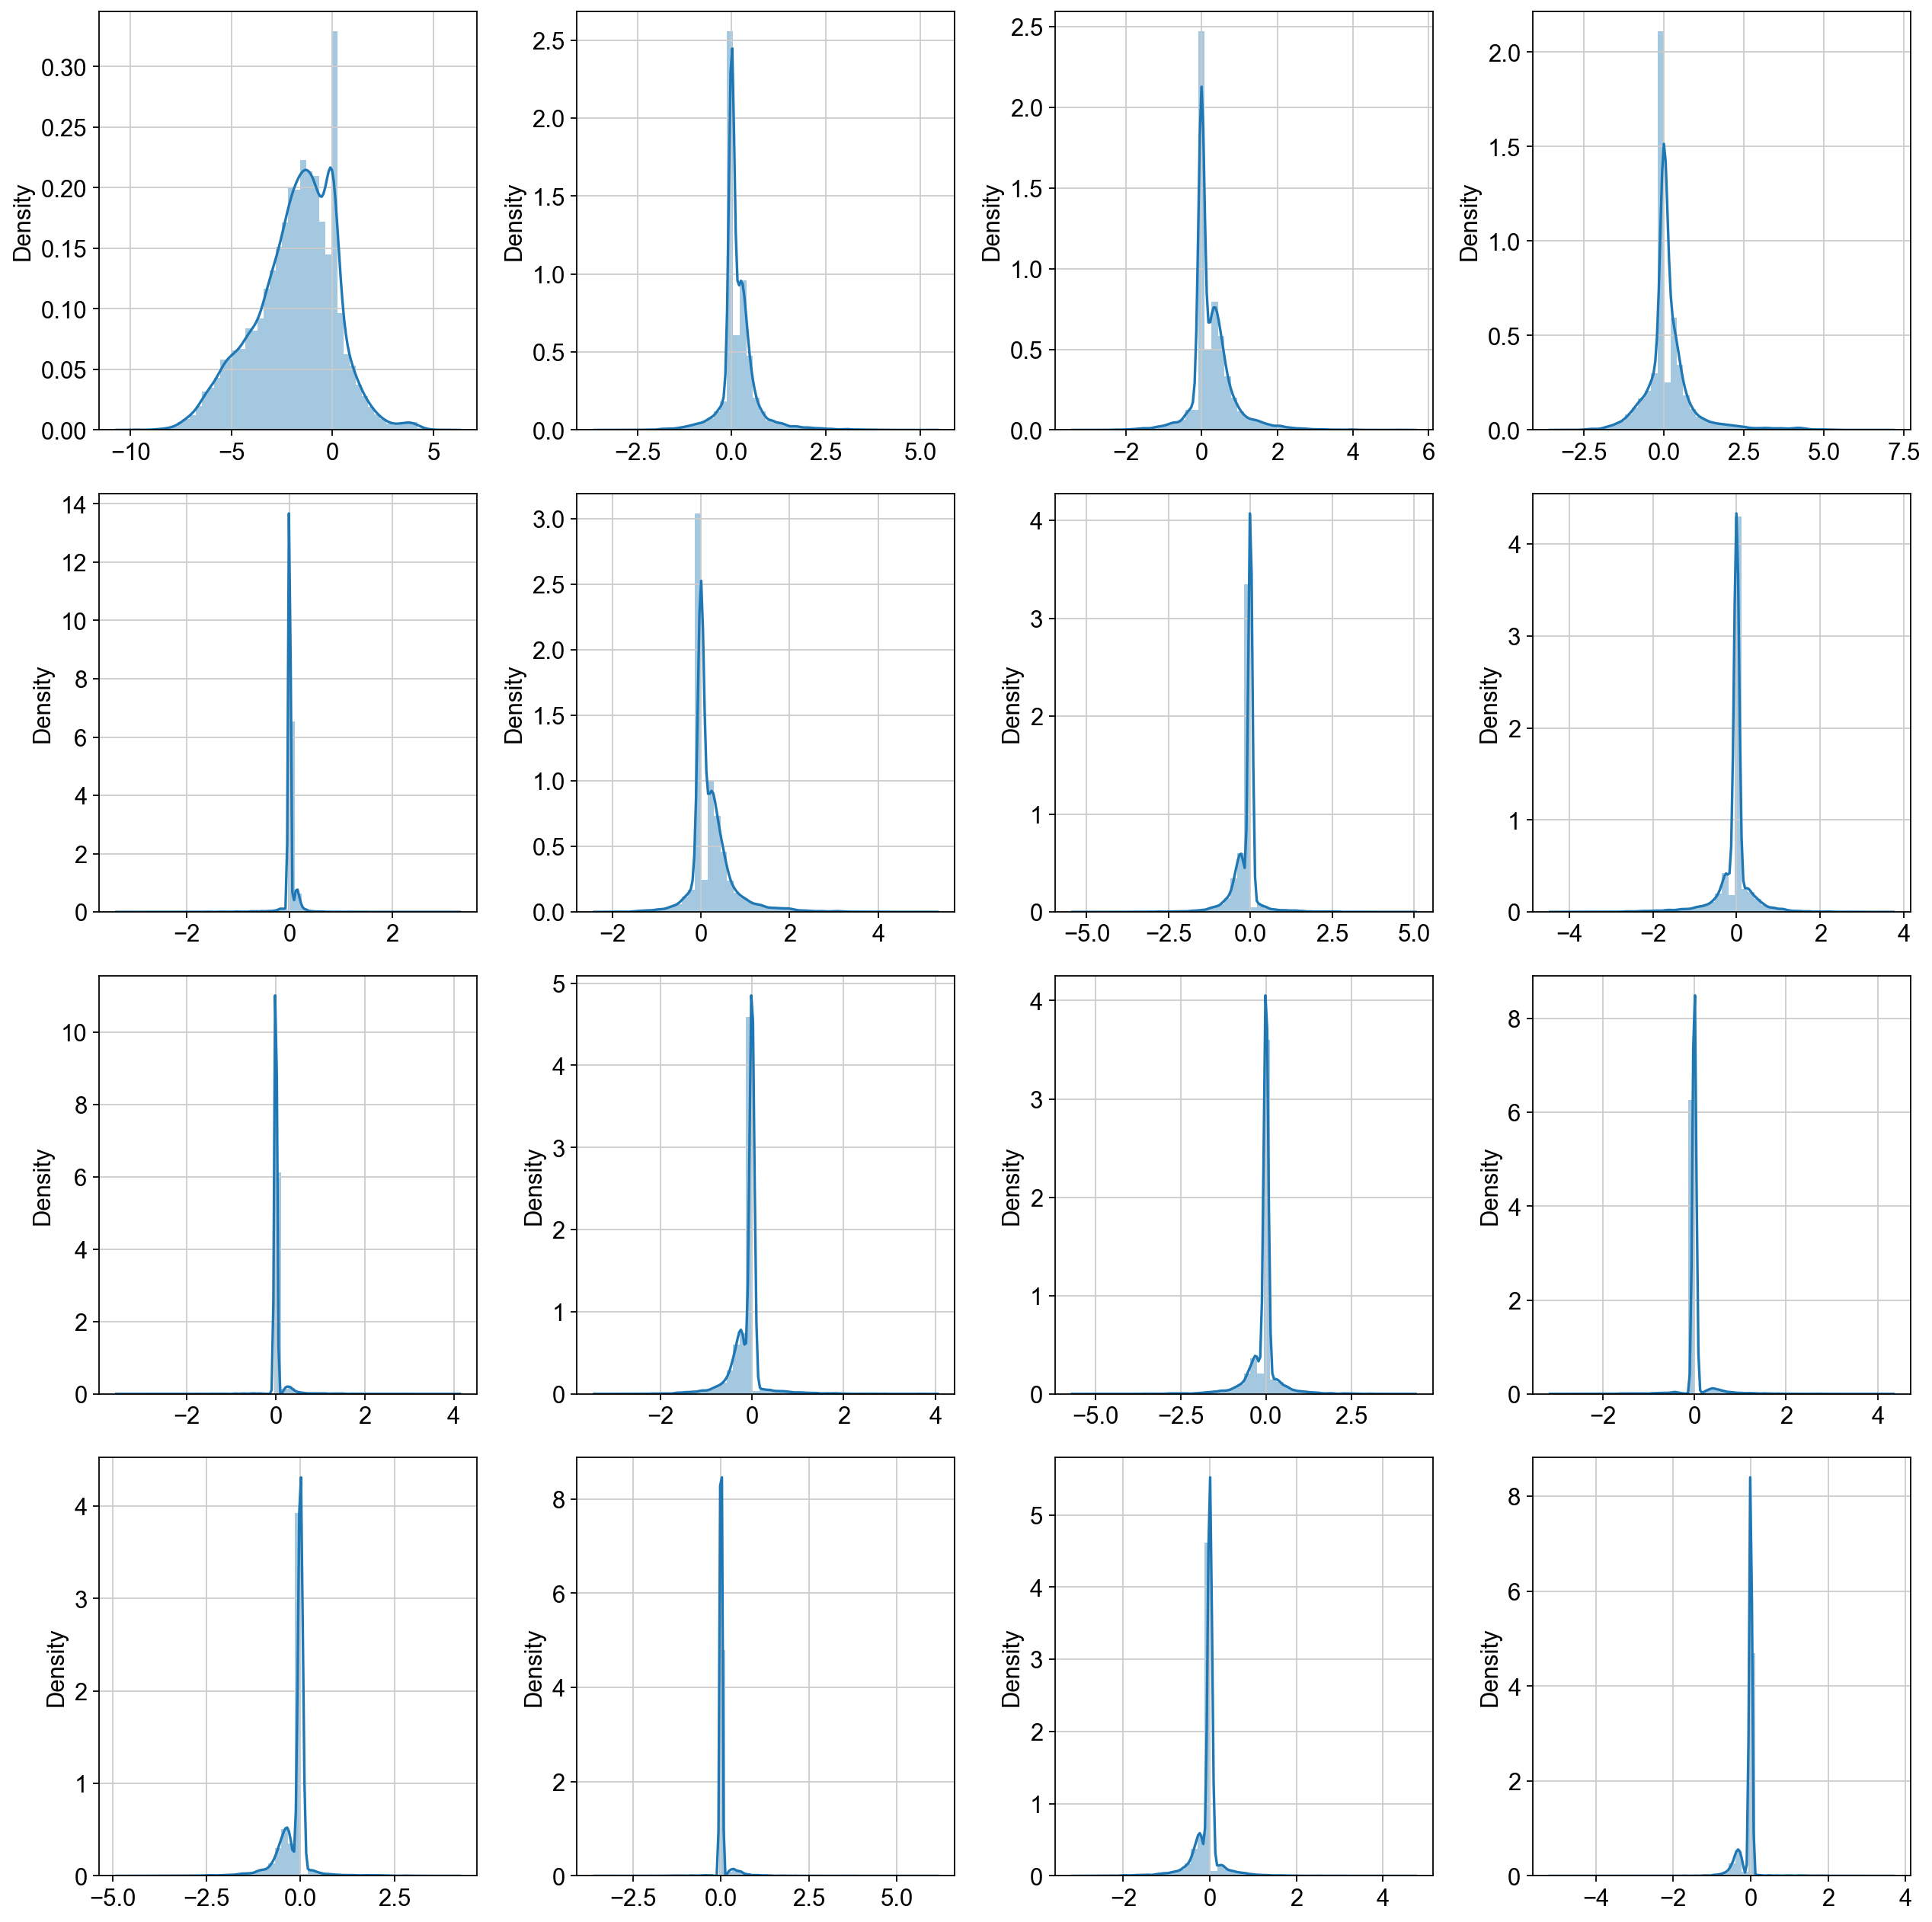

In [29]:
ncols = 4
nrows = len(de_test_theta_loc_masked.keys()) // ncols + int(len(de_test_theta_loc_masked.keys()) % ncols > 0)
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows))
for i, (k, v) in enumerate(de_test_theta_loc_masked.items()):
    sb.distplot(v.values, ax=ax[i // ncols, i % ncols])
plt.tight_layout()
plt.show()

Scale model:

Intercept


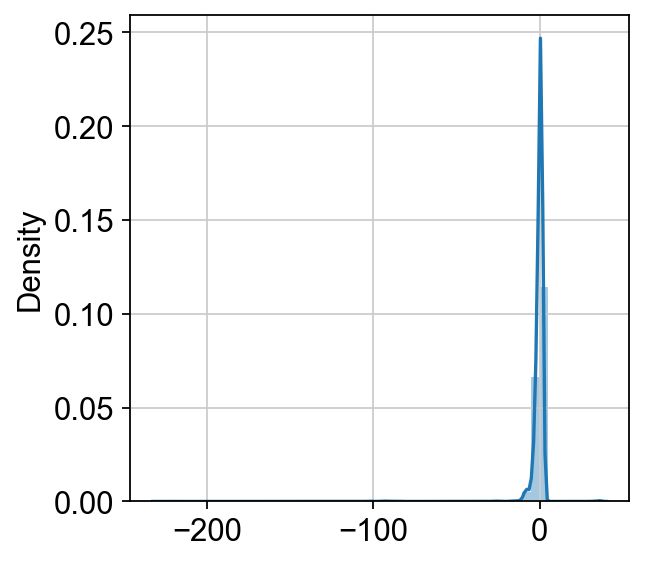

In [30]:
for k, v in de_test_theta_scale.items():
    print(k)
    sb.distplot(v.values)
    plt.show()

### Effect vectors

#### Single factors

In [31]:
sp_coefs = [
    "Ascl1_positive_condition[T.True]",
    "Foxa2_positive_condition[T.True]",
    "Myod1_positive_condition[T.True]",
    "Oct4_positive_condition[T.True]",
    "Sox2_positive_condition[T.True]",
]

Correlation of single factor effects:

<AxesSubplot:>

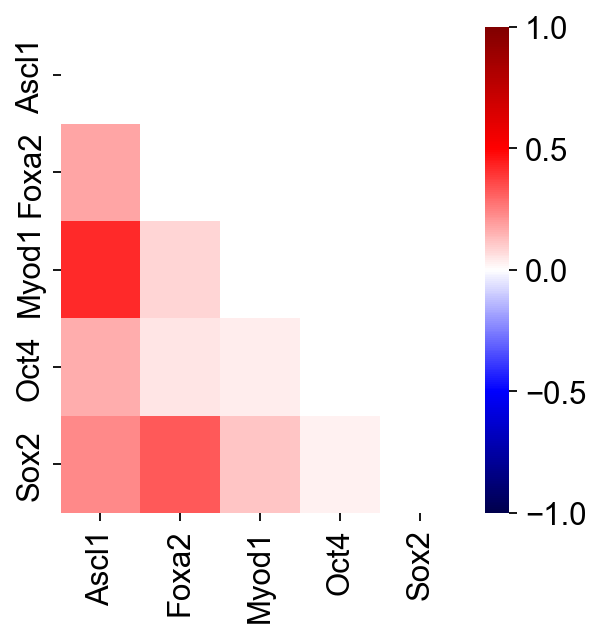

In [32]:
cor_mat = np.corrcoef(de_test_theta_loc_masked[sp_coefs].values.T)
cor_mat[np.arange(0, len(sp_coefs)), np.arange(0, len(sp_coefs))] = np.zeros((len(sp_coefs),))
cor_mat = np.tril(cor_mat)
cor_mat = pd.DataFrame(cor_mat, 
                       index=["".join(x.split("_positive_condition[T.True]")) for x in sp_coefs], 
                       columns=["".join(x.split("_positive_condition[T.True]")) for x in sp_coefs])
cor_mat[cor_mat == 0.] = np.nan
sb.heatmap(cor_mat, cmap="seismic", vmin=-1., vmax=1.)

Magnitude of single factor effects

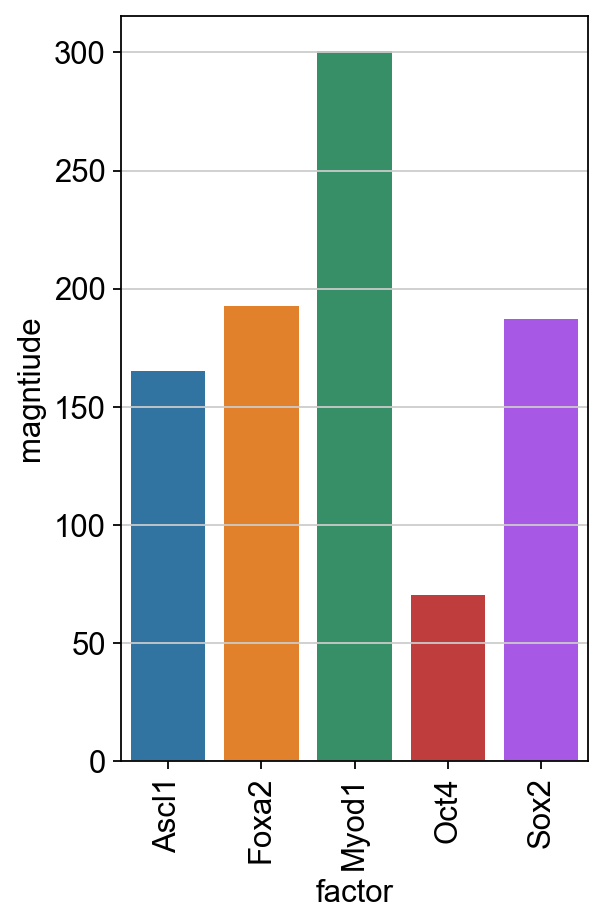

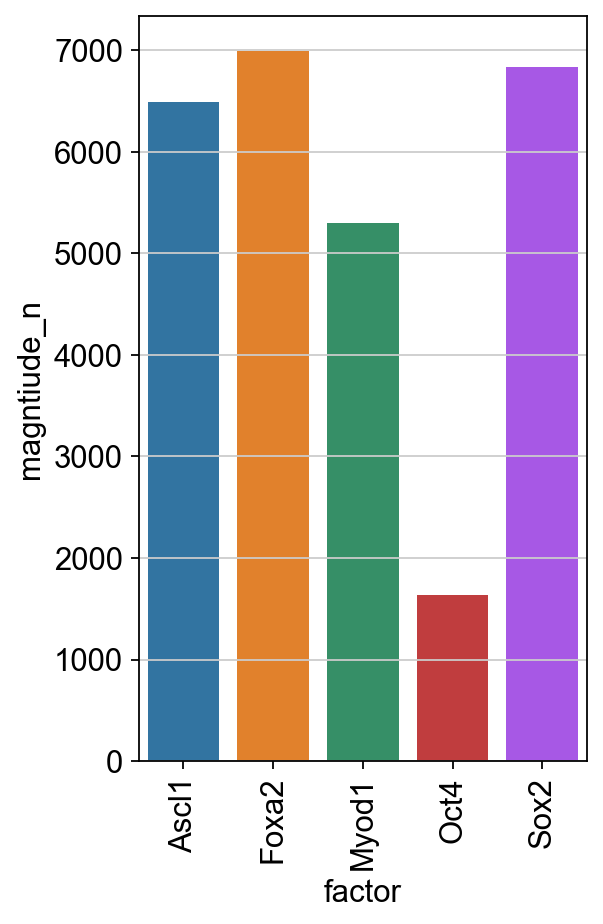

In [33]:
magntiude = pd.DataFrame({
    "magntiude": np.sqrt(np.sum(np.square(
        np.exp(de_test_theta_loc_masked[["Intercept"]].values + 
               de_test_theta_loc_masked[sp_coefs].values) -
        np.exp(de_test_theta_loc_masked[["Intercept"]].values)
    ), axis=0)),
    "magntiude_abs": np.sum(np.abs(
        np.exp(de_test_theta_loc_masked[["Intercept"]].values + 
               de_test_theta_loc_masked[sp_coefs].values) -
        np.exp(de_test_theta_loc_masked[["Intercept"]].values)
    ), axis=0),
    "magntiude_n": np.sum(de_test_theta_loc_masked[sp_coefs].values > 0, axis=0),
    "factor": ["".join(x.split("_positive_condition[T.True]")) for x in sp_coefs]
})
fig, ax = plt.subplots(1,1, figsize=(4, 6))
sb.barplot(data=magntiude, x="factor", y="magntiude", ax=ax)
ax.xaxis.set_tick_params(rotation=90)
plt.tight_layout()
plt.savefig(dir_out + "3a.pdf")
plt.show()

fig, ax = plt.subplots(1,1, figsize=(4, 6))
sb.barplot(data=magntiude, x="factor", y="magntiude_n", ax=ax)
ax.xaxis.set_tick_params(rotation=90)
plt.tight_layout()
plt.show()

#### Factor pairs

In [34]:
dp_coefs = [
    "Ascl1_positive_condition[T.True]:Foxa2_positive_condition[T.True]",
    "Ascl1_positive_condition[T.True]:Myod1_positive_condition[T.True]",
    "Ascl1_positive_condition[T.True]:Oct4_positive_condition[T.True]",
    "Ascl1_positive_condition[T.True]:Sox2_positive_condition[T.True]",
    "Foxa2_positive_condition[T.True]:Myod1_positive_condition[T.True]",
    "Foxa2_positive_condition[T.True]:Oct4_positive_condition[T.True]",
    "Foxa2_positive_condition[T.True]:Sox2_positive_condition[T.True]",
    "Myod1_positive_condition[T.True]:Oct4_positive_condition[T.True]",
    "Myod1_positive_condition[T.True]:Sox2_positive_condition[T.True]",
    "Oct4_positive_condition[T.True]:Sox2_positive_condition[T.True]", 
]

Magnitude of factor pair effects

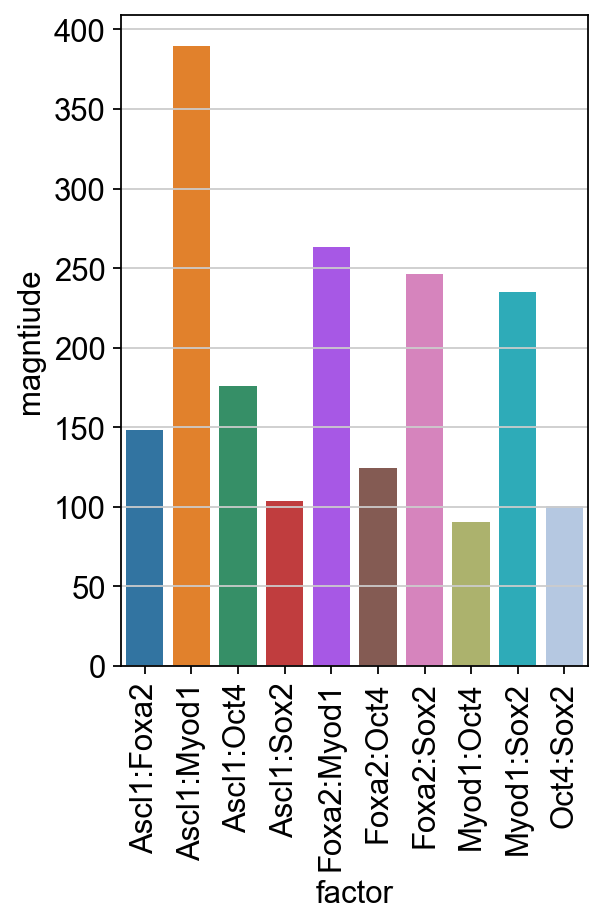

In [35]:
magntiude = pd.DataFrame({
    "magntiude": np.sqrt(np.sum(np.square(
        np.exp(de_test_theta_loc_masked[["Intercept"]].values + 
               de_test_theta_loc_masked[dp_coefs].values) -
        np.exp(de_test_theta_loc_masked[["Intercept"]].values)
    ), axis=0)),
    "magntiude_abs": np.sum(np.abs(
        np.exp(de_test_theta_loc_masked[["Intercept"]].values + 
               de_test_theta_loc_masked[dp_coefs].values) -
        np.exp(de_test_theta_loc_masked[["Intercept"]].values)
    ), axis=0),
    "factor": ["".join(x.split("_positive_condition[T.True]")) for x in dp_coefs]
})
fig, ax = plt.subplots(1,1, figsize=(4, 6))
sb.barplot(data=magntiude, x="factor", y="magntiude", ax=ax)
ax.xaxis.set_tick_params(rotation=90)
plt.tight_layout()

#### All effects

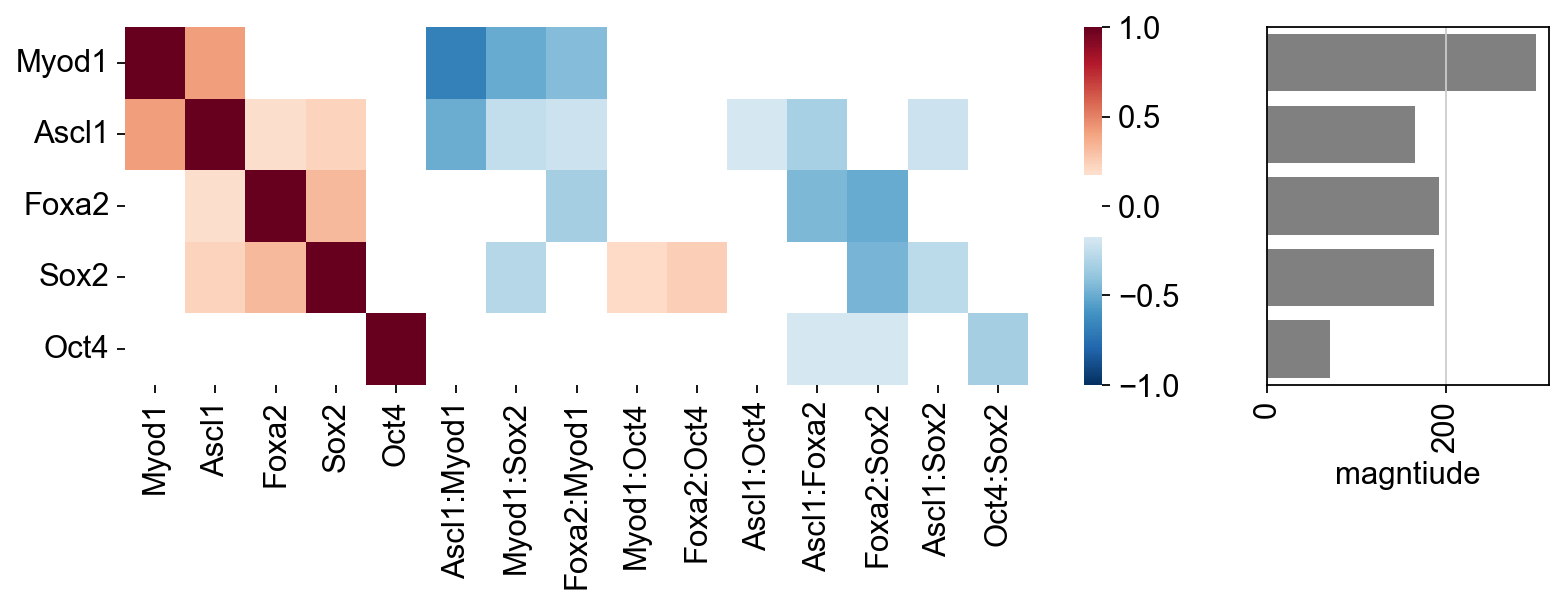

In [36]:
cor_mat = np.corrcoef(de_test_theta_loc_masked[sp_coefs + dp_coefs].values.T)
#cor_mat[np.arange(0, len(sp_coefs + dp_coefs)), np.arange(0, len(sp_coefs + dp_coefs))] = np.zeros((len(sp_coefs + dp_coefs),))
cor_mat = pd.DataFrame(cor_mat, 
                       index=["".join(x.split("_positive_condition[T.True]")) for x in sp_coefs + dp_coefs], 
                       columns=["".join(x.split("_positive_condition[T.True]")) for x in sp_coefs + dp_coefs])
cols1 = [
    'Myod1', 'Ascl1', 'Foxa2', 'Sox2', 'Oct4']
cols2 = ['Ascl1:Foxa2', 'Ascl1:Myod1',
    'Ascl1:Oct4', 'Ascl1:Sox2', 'Foxa2:Myod1', 'Foxa2:Oct4', 'Foxa2:Sox2',
    'Myod1:Oct4', 'Myod1:Sox2', 'Oct4:Sox2']
cols2 = cor_mat.loc[["Myod1"], cols2].min(axis=0).sort_values().index.tolist()
cols = cols1 + cols2
cor_mat = cor_mat.loc[cols, cols]
#cor_mat.values = np.triu(cor_mat.values)
cor_mat[cor_mat == 0.] = np.nan

magntiude = pd.DataFrame({
    "magntiude": np.sqrt(np.sum(np.square(
        np.exp(de_test_theta_loc_masked[["Intercept"]].values + 
               de_test_theta_loc_masked[sp_coefs + dp_coefs].values) -
        np.exp(de_test_theta_loc_masked[["Intercept"]].values)
    ), axis=0)),
    "magntiude_abs": np.sum(np.abs(
        np.exp(de_test_theta_loc_masked[["Intercept"]].values + 
               de_test_theta_loc_masked[sp_coefs + dp_coefs].values) -
        np.exp(de_test_theta_loc_masked[["Intercept"]].values)
    ), axis=0),
    "factor": ["".join(x.split("_positive_condition[T.True]")) for x in sp_coefs + dp_coefs]
})
magntiude.index = magntiude["factor"].values

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
original = cm.get_cmap('RdBu_r', 256)
newcolors = original(np.linspace(0, 1, 256))
white = np.array([256/256, 256/256, 256/256, 1])
newcolors[106:150, :] = white
newcmp = ListedColormap(newcolors)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharey=False, gridspec_kw={'width_ratios': [4, 1]})

factors_y = ['Myod1', 'Ascl1', 'Foxa2', 'Sox2', 'Oct4']
sb.heatmap(cor_mat.loc[factors_y, :], cmap=newcmp, vmin=-1., vmax=1., ax=ax[0])
ax[0].yaxis.set_tick_params(rotation=0)

sb.barplot(data=magntiude.loc[factors_y, :], y="factor", x="magntiude", ax=ax[1], color="grey")
ax[1].xaxis.set_tick_params(rotation=90)
ax[1].yaxis.set_ticks([])
ax[1].set_ylabel("")

plt.tight_layout()
plt.savefig(dir_out + "4c.pdf")
plt.show()

In [37]:
cor_mat_network = cor_mat.iloc[:5, 5:]
cor_mat_network["from"] = cor_mat_network.index
cor_mat_network = cor_mat_network.melt(var_name="from_to", id_vars="from")
cor_mat_network["to"] = [[y for y in x2.split(":") if y != x][0] 
                         for x, x2 in zip(cor_mat_network["from"].values, cor_mat_network["from_to"].values)]
cor_mat_network = cor_mat_network.loc[[
    x in x2
    for x, x2 in zip(cor_mat_network["from"].values, cor_mat_network["from_to"].values)
], :]
cor_mat_network["value_width"] = [
    (np.abs(x) - np.min(np.abs(cor_mat_network["value"].values))) / 
    (np.max(np.abs(cor_mat_network["value"].values)) - np.min(np.abs(cor_mat_network["value"].values)))
    for x in cor_mat_network["value"].values]
cor_mat_network["value_color"] = [
    (x - np.min(cor_mat_network["value"].values)) / 
    (np.max(cor_mat_network["value"].values) - np.min(cor_mat_network["value"].values))
    for x in cor_mat_network["value"].values]
cor_mat_network = cor_mat_network.drop_duplicates("from_to")
cor_mat_network.sort_values("from")

from      from_to     value     to  value_width  value_color
26  Ascl1   Ascl1:Oct4 -0.177818   Oct4     0.227228     0.772772
31  Ascl1  Ascl1:Foxa2 -0.328850  Foxa2     0.456961     0.543039
41  Ascl1   Ascl1:Sox2 -0.217836   Sox2     0.288099     0.711901
22  Foxa2   Foxa2:Oct4 -0.092506   Oct4     0.097460     0.902540
37  Foxa2   Foxa2:Sox2 -0.501046   Sox2     0.718888     0.281112
0   Myod1  Ascl1:Myod1 -0.685856  Ascl1     1.000000     0.000000
5   Myod1   Myod1:Sox2 -0.500052   Sox2     0.717375     0.282625
10  Myod1  Foxa2:Myod1 -0.437159  Foxa2     0.621710     0.378290
15  Myod1   Myod1:Oct4 -0.145891   Oct4     0.178664     0.821336
48   Sox2    Oct4:Sox2 -0.115445   Oct4     0.132353     0.867647

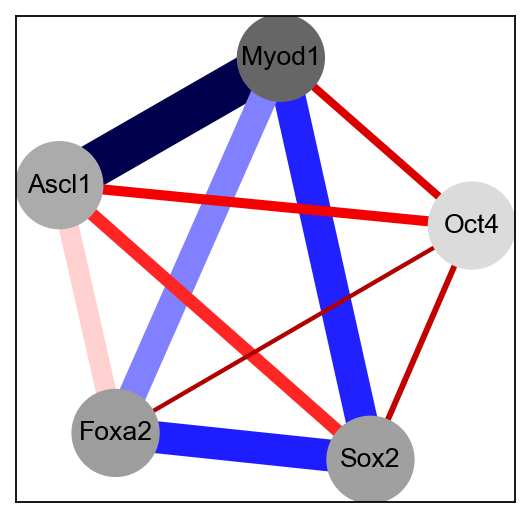

In [38]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
G=nx.from_pandas_edgelist(
    cor_mat_network, source='from', target='to', 
    edge_attr=["value_color", "value_width"], 
    create_using=nx.Graph())
nodes = ['Myod1', 'Ascl1', 'Sox2', 'Foxa2', 'Oct4']
magnitudes_nodes = magntiude.loc[nodes, ["magntiude"]]
nx.set_node_attributes(G, dict([
    (x, magnitudes_nodes.loc[x, "magntiude"] / np.max(magnitudes_nodes["magntiude"].values)*0.6) 
    for x in nodes
]), "magntiude")
pos=nx.spring_layout(G)
labels_color = nx.get_edge_attributes(G, 'value_color')
labels_width = nx.get_edge_attributes(G, 'value_width')
node_color = nx.get_node_attributes(G, 'magntiude')
nx.draw_networkx(
    G, pos, with_labels=True, node_size=1500,
    width=[x * 20. for x in list(labels_width.values())], 
    edge_color=list(labels_color.values()), edge_vmin=0., edge_vmax=1., edge_cmap=plt.cm.seismic,
    node_color=list(node_color.values()), vmin=0., vmax=1., cmap=plt.cm.binary,
)
plt.grid(b=None)

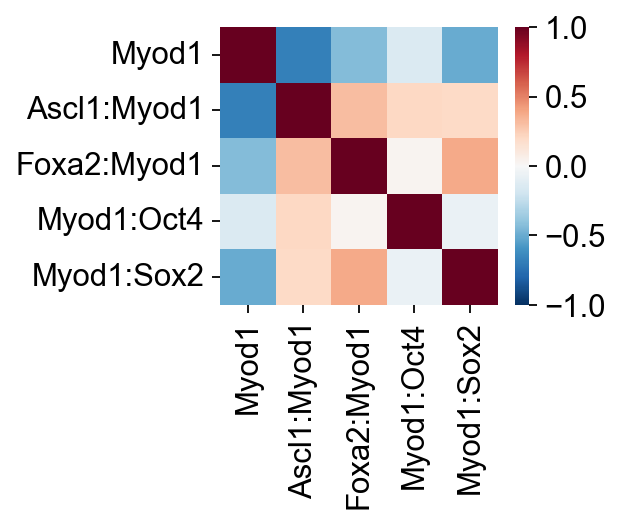

In [39]:
cor_mat = np.corrcoef(de_test_theta_loc_masked[sp_coefs + dp_coefs].values.T)
#cor_mat[np.arange(0, len(sp_coefs + dp_coefs)), np.arange(0, len(sp_coefs + dp_coefs))] = np.zeros((len(sp_coefs + dp_coefs),))
cor_mat = pd.DataFrame(cor_mat, 
                       index=["".join(x.split("_positive_condition[T.True]")) for x in sp_coefs + dp_coefs], 
                       columns=["".join(x.split("_positive_condition[T.True]")) for x in sp_coefs + dp_coefs])
cols = ['Myod1', 'Ascl1:Myod1', 'Foxa2:Myod1', 'Myod1:Oct4', 'Myod1:Sox2']
cor_mat = cor_mat.loc[cols, cols]
cor_mat[cor_mat == 0.] = np.nan

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3.5))

sb.heatmap(cor_mat, cmap="RdBu_r", vmin=-1., vmax=1., ax=ax)
ax.yaxis.set_tick_params(rotation=0)

plt.tight_layout()
plt.savefig(dir_out + "EV2c.pdf")
plt.show()

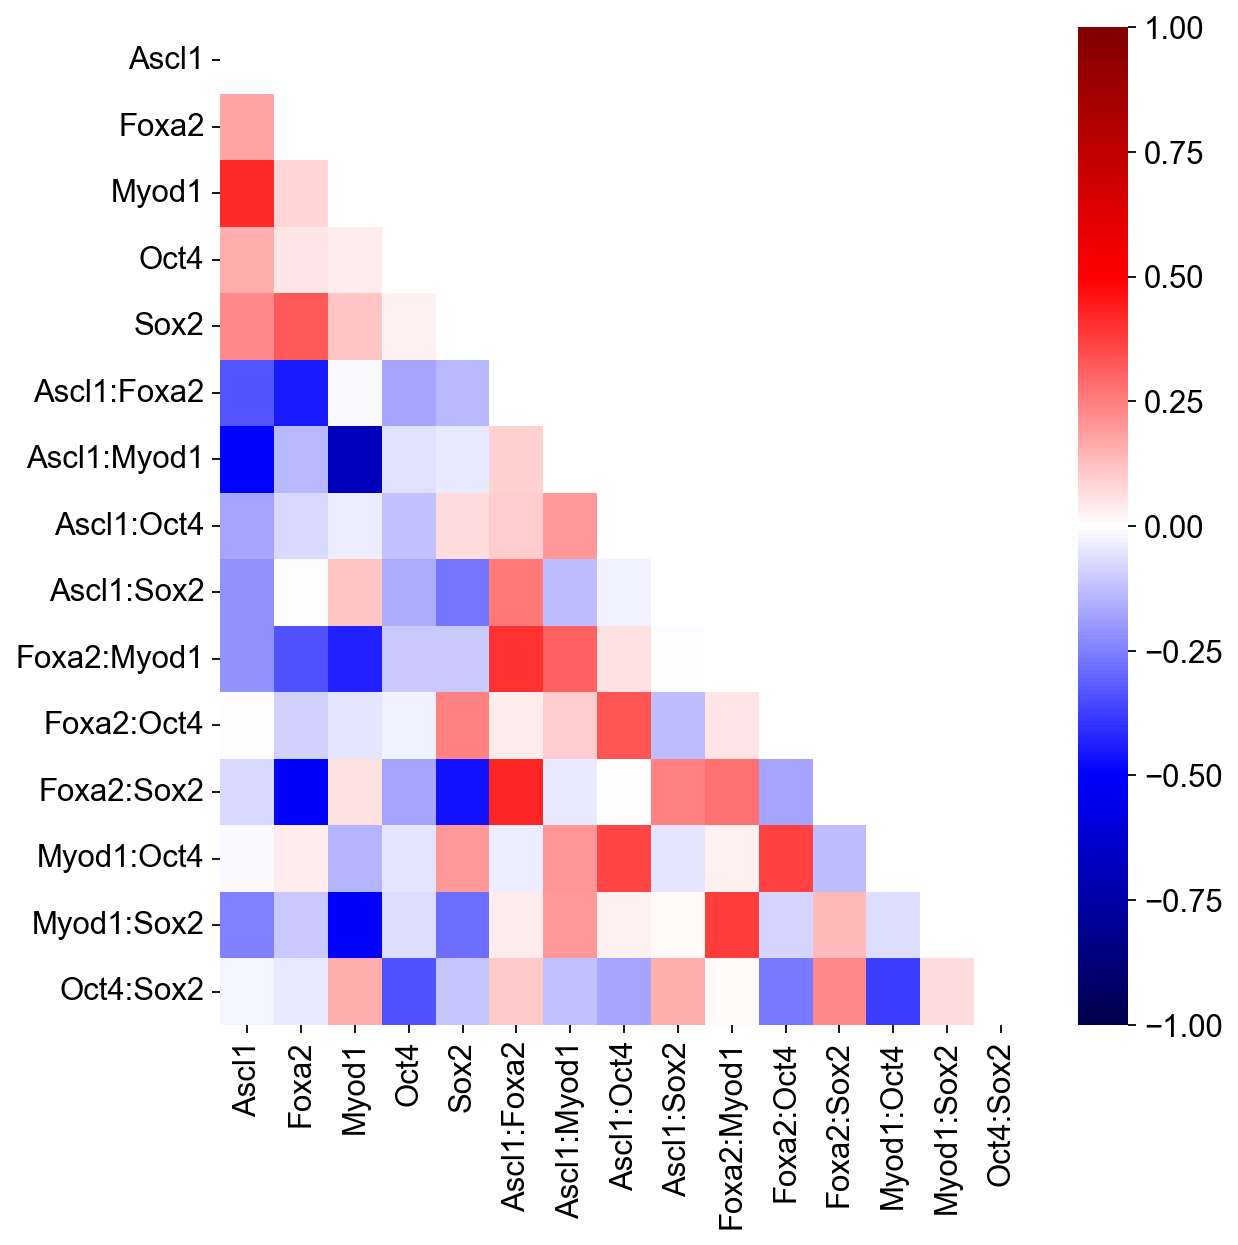

In [40]:
cor_mat = np.corrcoef(de_test_theta_loc_masked[sp_coefs + dp_coefs].values.T)
cor_mat[np.arange(0, len(sp_coefs + dp_coefs)), np.arange(0, len(sp_coefs + dp_coefs))] = np.zeros((len(sp_coefs + dp_coefs),))
cor_mat = np.tril(cor_mat)
cor_mat = pd.DataFrame(cor_mat, 
                       index=["".join(x.split("_positive_condition[T.True]")) for x in sp_coefs + dp_coefs], 
                       columns=["".join(x.split("_positive_condition[T.True]")) for x in sp_coefs + dp_coefs])
cor_mat[cor_mat == 0.] = np.nan
fig, ax = plt.subplots(1,1, figsize=(8, 8))
sb.heatmap(cor_mat, ax=ax, cmap="seismic", vmin=-1., vmax=1.)
plt.tight_layout()
plt.show()

Magnitude of factor effects

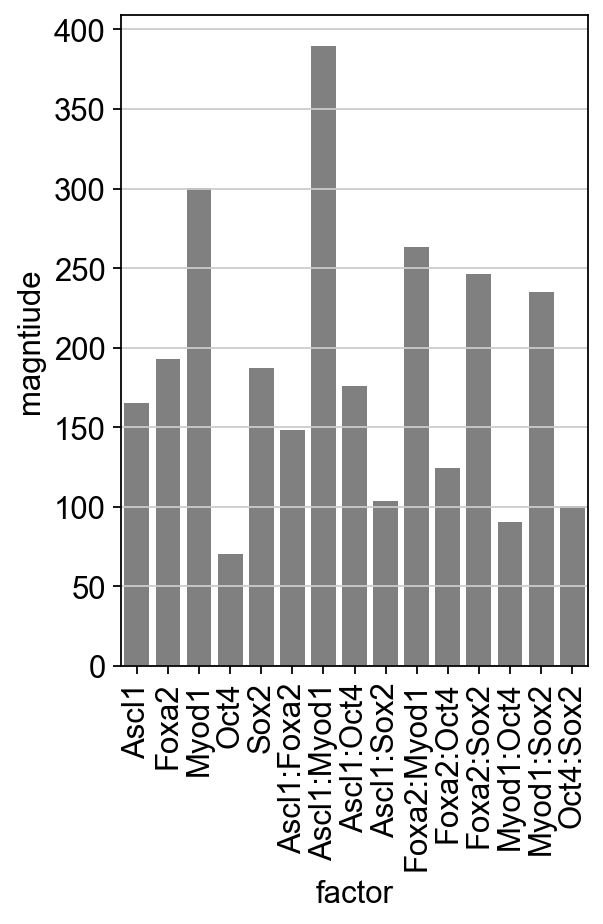

In [41]:
magntiude = pd.DataFrame({
    "magntiude": np.sqrt(np.sum(np.square(
        np.exp(de_test_theta_loc_masked[["Intercept"]].values + 
               de_test_theta_loc_masked[sp_coefs + dp_coefs].values) -
        np.exp(de_test_theta_loc_masked[["Intercept"]].values)
    ), axis=0)),
    "magntiude_abs": np.sum(np.abs(
        np.exp(de_test_theta_loc_masked[["Intercept"]].values + 
               de_test_theta_loc_masked[sp_coefs + dp_coefs].values) -
        np.exp(de_test_theta_loc_masked[["Intercept"]].values)
    ), axis=0),
    "factor": ["".join(x.split("_positive_condition[T.True]")) for x in sp_coefs + dp_coefs]
})
fig, ax = plt.subplots(1,1, figsize=(4, 6))
sb.barplot(data=magntiude, x="factor", y="magntiude", ax=ax, color="grey")
ax.xaxis.set_tick_params(rotation=90)
plt.tight_layout()
plt.show()

### Extract up and down regulated genes

In [42]:
mean_threshold = 0.5
fc_threshold = 1.5

gene_lists_up = {}
gene_lists_down = {}

for k, v in de_test_summary.items():
    k_short = "".join(k.split("_positive_condition[T.True]"))
    k_short = "_".join(k_short.split(":"))
    summary = v
    summary_filter = summary.copy()
    summary = summary.loc[np.logical_and(
        np.logical_and(
            summary_filter['qval'].values < 0.01,
            de_test_theta_loc_notoverfitted[k].values == 1.
        ),
        np.logical_and(
            np.abs(summary['log2fc'].values) > np.log(fc_threshold), 
            summary['mean'].values > mean_threshold
        ),
    ),]

    summary_1 = summary.sort_values(['log2fc'], ascending = False)
    summary_1 = summary_1.iloc[summary_1['log2fc'].values > 0]
    gene_lists_up[k] = summary_1['gene'].tolist()
    summary_1.to_csv(dir_tables + f"new_tf_de_{k_short}_up.csv")

    summary_2 = summary.sort_values(['log2fc'], ascending = True)
    summary_2 = summary_2.iloc[summary_2['log2fc'].values < 0]
    gene_lists_down[k] = summary_2['gene'].tolist()
    summary_2.to_csv(dir_tables + f"new_tf_de_{k_short}_down.csv")

In [43]:
for k, _ in de_test_summary.items():
    print("\n" + k)
    print("up-regulated: %i genes" % len(gene_lists_up[k]))
    print("down-regulated: %i genes" % len(gene_lists_down[k]))


Intercept
up-regulated: 1266 genes
down-regulated: 5218 genes

Ascl1_positive_condition[T.True]:Foxa2_positive_condition[T.True]
up-regulated: 260 genes
down-regulated: 1185 genes

Ascl1_positive_condition[T.True]:Myod1_positive_condition[T.True]
up-regulated: 516 genes
down-regulated: 693 genes

Ascl1_positive_condition[T.True]:Oct4_positive_condition[T.True]
up-regulated: 290 genes
down-regulated: 74 genes

Ascl1_positive_condition[T.True]:Sox2_positive_condition[T.True]
up-regulated: 192 genes
down-regulated: 758 genes

Foxa2_positive_condition[T.True]:Myod1_positive_condition[T.True]
up-regulated: 459 genes
down-regulated: 995 genes

Foxa2_positive_condition[T.True]:Oct4_positive_condition[T.True]
up-regulated: 543 genes
down-regulated: 225 genes

Foxa2_positive_condition[T.True]:Sox2_positive_condition[T.True]
up-regulated: 240 genes
down-regulated: 1642 genes

Myod1_positive_condition[T.True]:Oct4_positive_condition[T.True]
up-regulated: 456 genes
down-regulated: 89 genes

Myod1

## Overlap to CHIP

In [44]:
# Set download to True when first running this on a new platform.
archive = tft.reading.LoaderDbarchive(
    path=dir_dbarchive, distance_to_load=10, download=False,
    target_genes=["Myod1", "Ascl1", "Hnf1a", "Sox2", "Pou5f1", "Foxa2"])
archive.load()
archive.treshold(threshold=100)
chip_genes = dict([(k, v["gene"].values.tolist()) for k, v in archive.targets.items()])

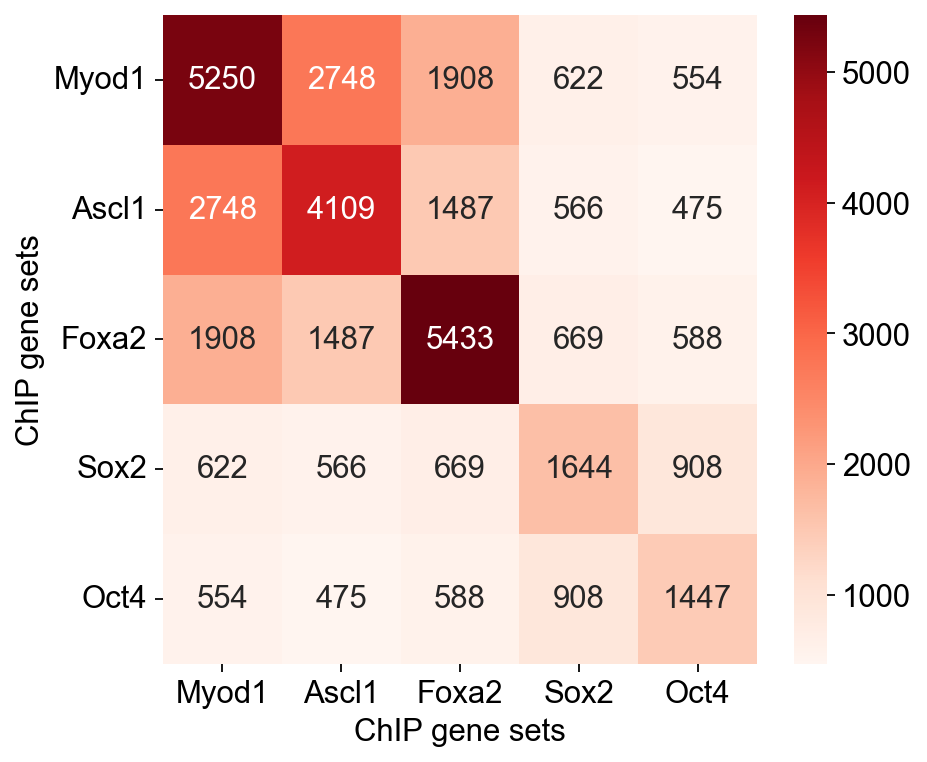

In [45]:
cols = ["Myod1", "Ascl1", "Foxa2", "Sox2", "Oct4"]
mat = pd.DataFrame(np.zeros((len(cols), len(cols))), index=cols, columns=cols)
for k in cols:
    k2 = k if k != "Oct4" else "Pou5f1"
    for kk in cols:
        kk2 = kk if kk != "Oct4" else "Pou5f1"
        mat.loc[k, kk] = len(set(chip_genes[k2.lower()]).intersection(set(chip_genes[kk2.lower()])))
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax = sb.heatmap(mat, cmap="Reds", annot=True, fmt=".0f", ax=ax)
ax.set_xlabel("ChIP gene sets")
ax.set_ylabel("ChIP gene sets")
ax.yaxis.set_tick_params(rotation=0)
plt.tight_layout()
plt.show()

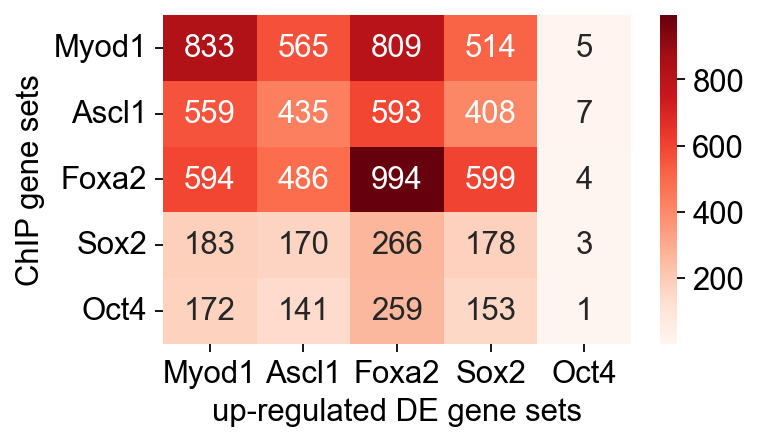

In [46]:
cols = ["Myod1", "Ascl1", "Foxa2", "Sox2", "Oct4"]
mat = pd.DataFrame(np.zeros((5,5)), index=cols, columns=cols)
for k in cols:
    for kk in cols:
        k2 = k if k != "Oct4" else "Pou5f1"
        mat.loc[k, kk] = len(set(chip_genes[k2.lower()]).intersection(
            set(gene_lists_up[kk + "_positive_condition[T.True]"])
        ))
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax = sb.heatmap(mat, cmap="Reds", annot=True, fmt=".0f", ax=ax)
ax.set_xlabel("up-regulated DE gene sets")
ax.set_ylabel("ChIP gene sets")
ax.yaxis.set_tick_params(rotation=0)
plt.tight_layout()
plt.show()